In [ ]:
import pandas as pd
titanic=pd.read_csv('titanic_train.csv')
print('連結完成')
print(titanic.head(10))
print('改為網頁輸出，較方便查看內容')
titanic.to_html('titanic1.html')
print('了解欄位名稱，-容易有誤判風險')
print(titanic.columns)
print('儲存欄位名稱')
cols=titanic.columns
titanic.columns=[str.replace('-','_') for str in cols] ##將欄位名稱中的-改為_
print('修改完成')
print(titanic.columns)
print('改為網頁輸出，較方便查看內容')
titanic.to_html('titanic2.html')

連結完成
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    mal

In [ ]:
print('查找遺失值1')
print(titanic.isnull().sum()) #每個欄位的遺失值數量
print('查看每個欄位的資料型態')
print('主要目的查看那些欄位是object，object代表文字型態')
print(titanic.dtypes) #全部欄位的資料型態

查找遺失值1
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
查看每個欄位的資料型態
主要目的查看那些欄位是object，object代表文字型態
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Age 177、Cabin 687、Embarked 2有遺失值，需要處理，總共資料為890
之前的自駕車資料，money欄位是y是訓練的目標有遺失值，用取代的方式會有不公平情況，所以選擇刪除遺失值
Cabin欄位遺失值過高，沒有參考價值，所以整個欄位將要刪除
港口Embarked有兩個遺失值，我們先了解資料分布情況
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64
C+Q的總和與S港的數量差異很大，所以2個遺失值不影響港口的選擇
所以我們選擇加入最多資料的港口
Embarked最多資料： 0    S
Name: Embarked, dtype: object
年齡Age有177個遺失值，這是數值欄位
Age的最小值： 0.42
Age的最大值： 80.0
Age的平均值： 29.36158249158249
Age的中位數： 28.0


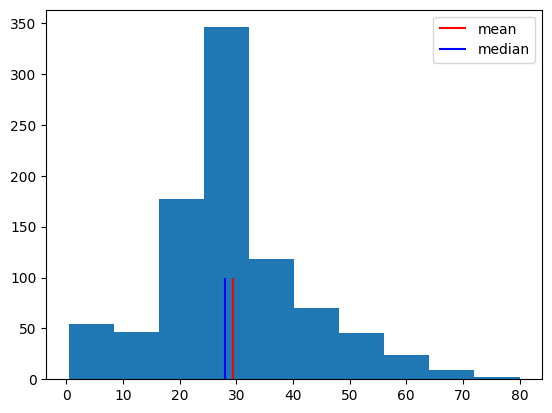

Age欄位若填充0不合適，沒有人0歲
Age欄位的平均值有被拉高，也就是有比較大的數值存在
Age欄位適合填充中位數
Age的最小值： 0.42
Age的最大值： 80.0
Age的平均值： 29.36158249158249
Age的中位數： 28.0


/tmp/ipython-input-152746526.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(),inplace=True)


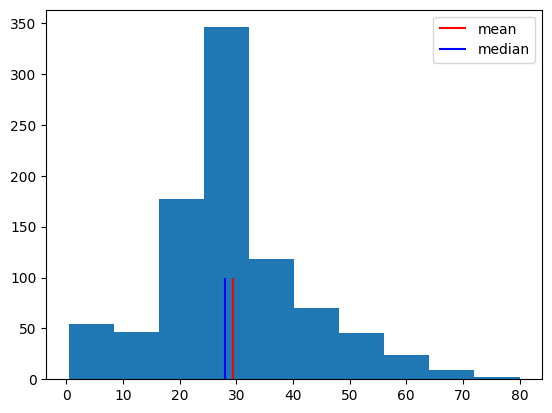

查找遺失值2
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
查看每個欄位的資料型態
主要目的查看那些欄位是object，object代表文字型態
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


In [ ]:
print('Age 177、Cabin 687、Embarked 2有遺失值，需要處理，總共資料為890')
print('之前的自駕車資料，money欄位是y是訓練的目標有遺失值，用取代的方式會有不公平情況，所以選擇刪除遺失值')
print('Cabin欄位遺失值過高，沒有參考價值，所以整個欄位將要刪除')
try:
  titanic.drop(columns=['Cabin'],inplace=True) #刪除Cabin欄位
except:
  pass
print('港口Embarked有兩個遺失值，我們先了解資料分布情況')
print(titanic['Embarked'].value_counts()) #計算各個港口的數量
print('C+Q的總和與S港的數量差異很大，所以2個遺失值不影響港口的選擇')
print('所以我們選擇加入最多資料的港口')
print('Embarked最多資料：',titanic['Embarked'].mode()) #計算眾數
try:
  titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)
except:
  pass
print('年齡Age有177個遺失值，這是數值欄位')
print('Age的最小值：',titanic['Age'].min())
print('Age的最大值：',titanic['Age'].max())
print('Age的平均值：',titanic['Age'].mean())
print('Age的中位數：',titanic['Age'].median())
import matplotlib.pyplot as plt
plt.hist(titanic['Age'])
plt.vlines(titanic['Age'].mean(),0,100,color='red',label='mean')
plt.vlines(titanic['Age'].median(),0,100,color='blue',label='median')
plt.legend()
plt.show()
print('Age欄位若填充0不合適，沒有人0歲')
print('Age欄位的平均值有被拉高，也就是有比較大的數值存在')
print('Age欄位適合填充中位數')
try:
  titanic['Age'].fillna(titanic['Age'].median(),inplace=True) #填充中位數
except:
  pass
print('Age的最小值：',titanic['Age'].min())
print('Age的最大值：',titanic['Age'].max())
print('Age的平均值：',titanic['Age'].mean())
print('Age的中位數：',titanic['Age'].median())
import matplotlib.pyplot as plt
plt.hist(titanic['Age'])
plt.vlines(titanic['Age'].mean(),0,100,color='red',label='mean')
plt.vlines(titanic['Age'].median(),0,100,color='blue',label='median')
plt.legend()
plt.show()
print('查找遺失值2')
print(titanic.isnull().sum())#計算遺失值數量
print('查看每個欄位的資料型態')
print('主要目的查看那些欄位是object，object代表文字型態')
print(titanic.dtypes) #全部欄位的資料型態


In [12]:
print('遺失值乍看之下沒有，我們再來做一個動作確認')
print('分成數值與字串兩種欄位資料紀錄')
list3=[] #數值欄位
list4=[] #字串欄位
for i in titanic.columns:
  print('欄位名稱:',i)
  print('欄位資料型態:',titanic[i].dtype)
  print('假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在')
  if titanic[i].dtype==object:
    try:
      titanic[i]=titanic[i].astype('float') #轉換
      list3.append(i) #轉換成功
      print('轉換成功')
    except:
      print('不能轉換')
      list4.append(i) #文字資料
  else:
    list3.append(i)

print('數值欄位:',list3)
print('文字欄位:',list4)

遺失值乍看之下沒有，我們再來做一個動作確認
分成數值與字串兩種欄位資料紀錄
欄位名稱: PassengerId
欄位資料型態: int64
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
欄位名稱: Survived
欄位資料型態: int64
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
欄位名稱: Pclass
欄位資料型態: int64
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
欄位名稱: Name
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: Sex
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: Age
欄位資料型態: float64
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
欄位名稱: SibSp
欄位資料型態: int64
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
欄位名稱: Parch
欄位資料型態: int64
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
欄位名稱: Ticket
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: Fare
欄位資料型態: float64
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
欄位名稱: Embarked
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
數值欄位: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
文字欄位: ['Name', 'Sex', 'Ticket', 'Embarked']


字串部分，以Bar顯示，分類方式操作


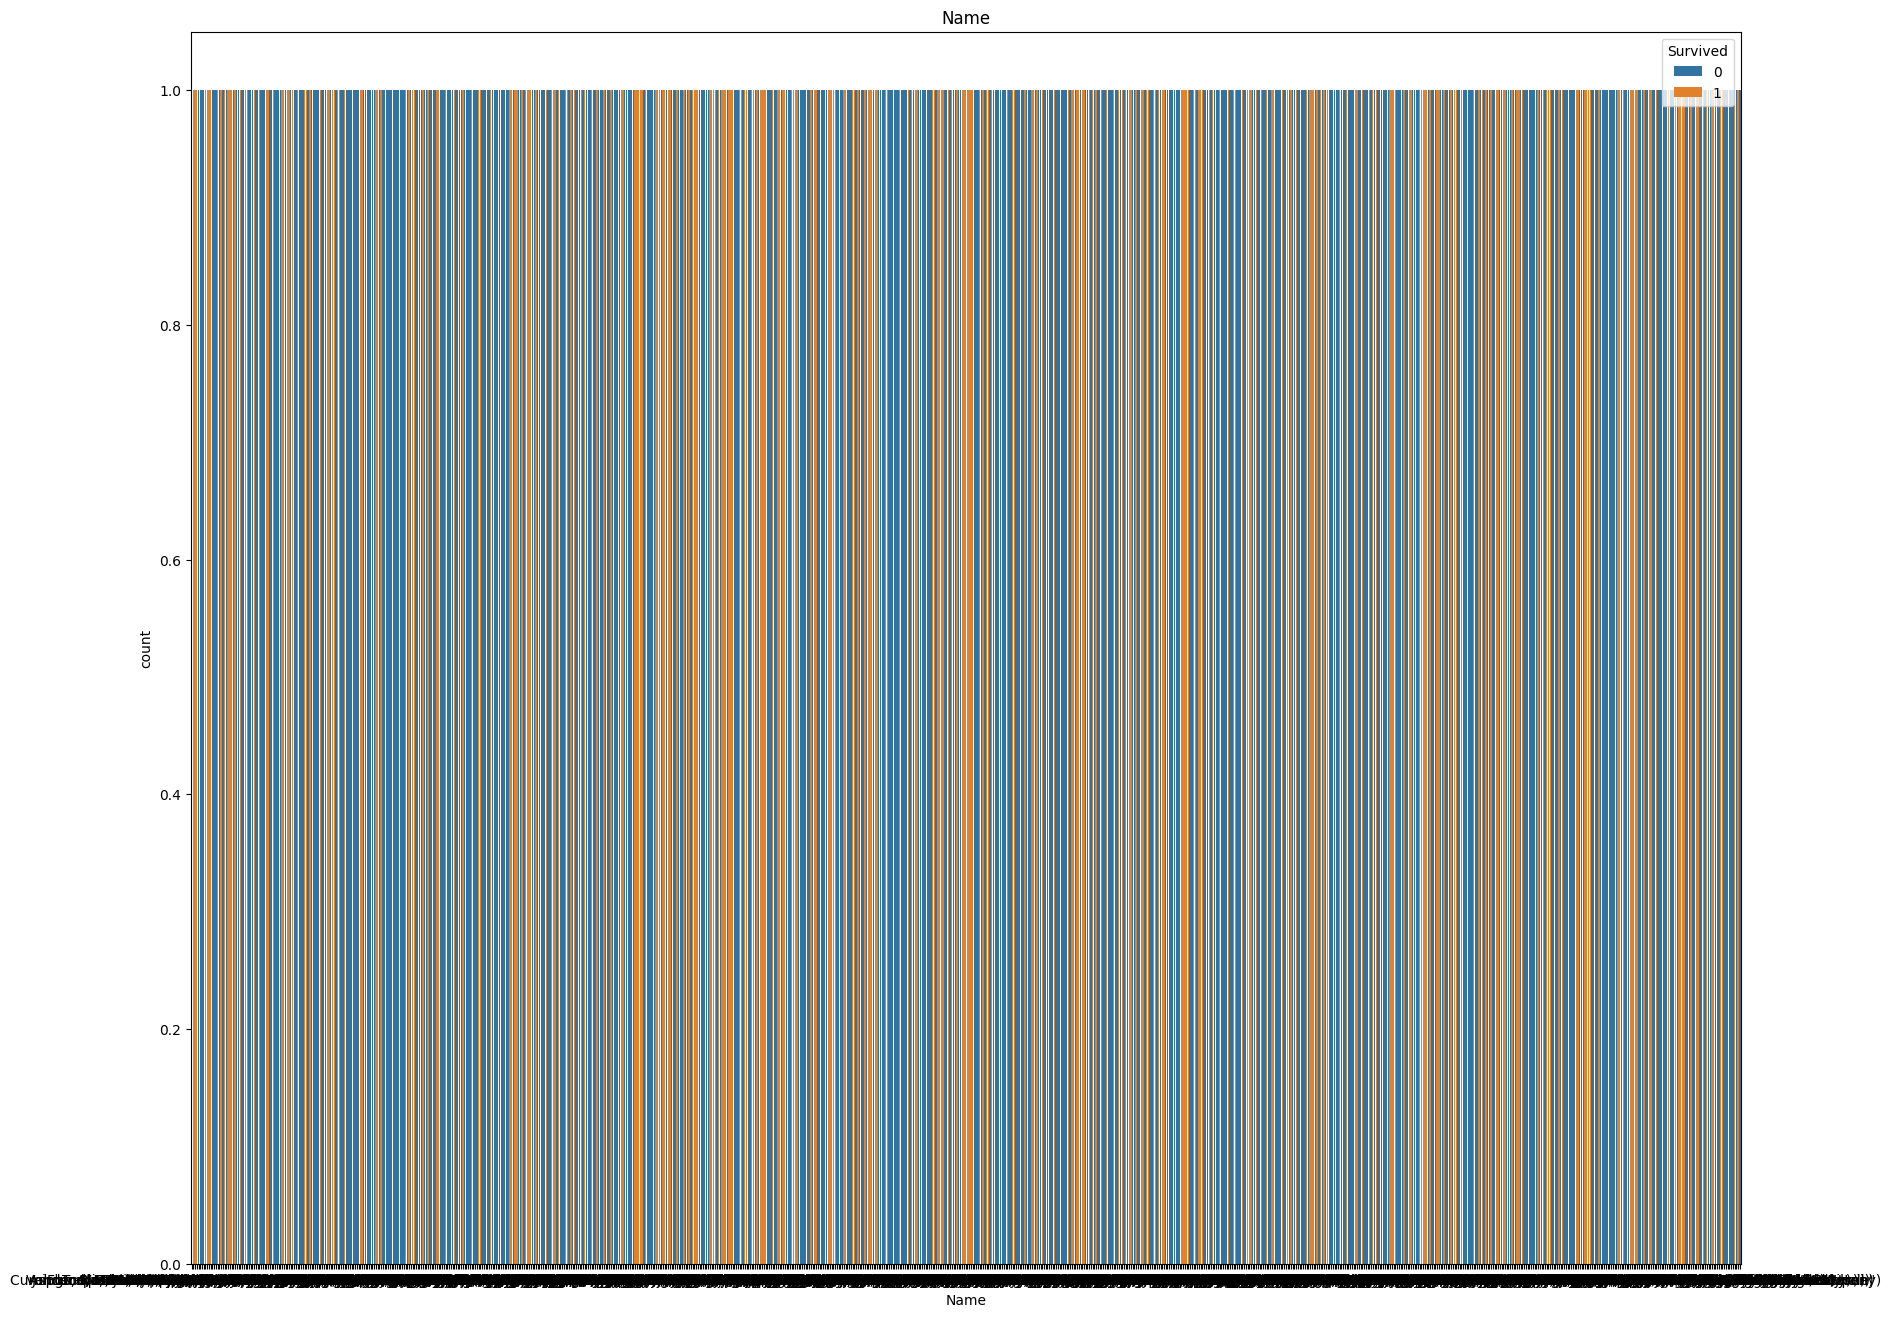

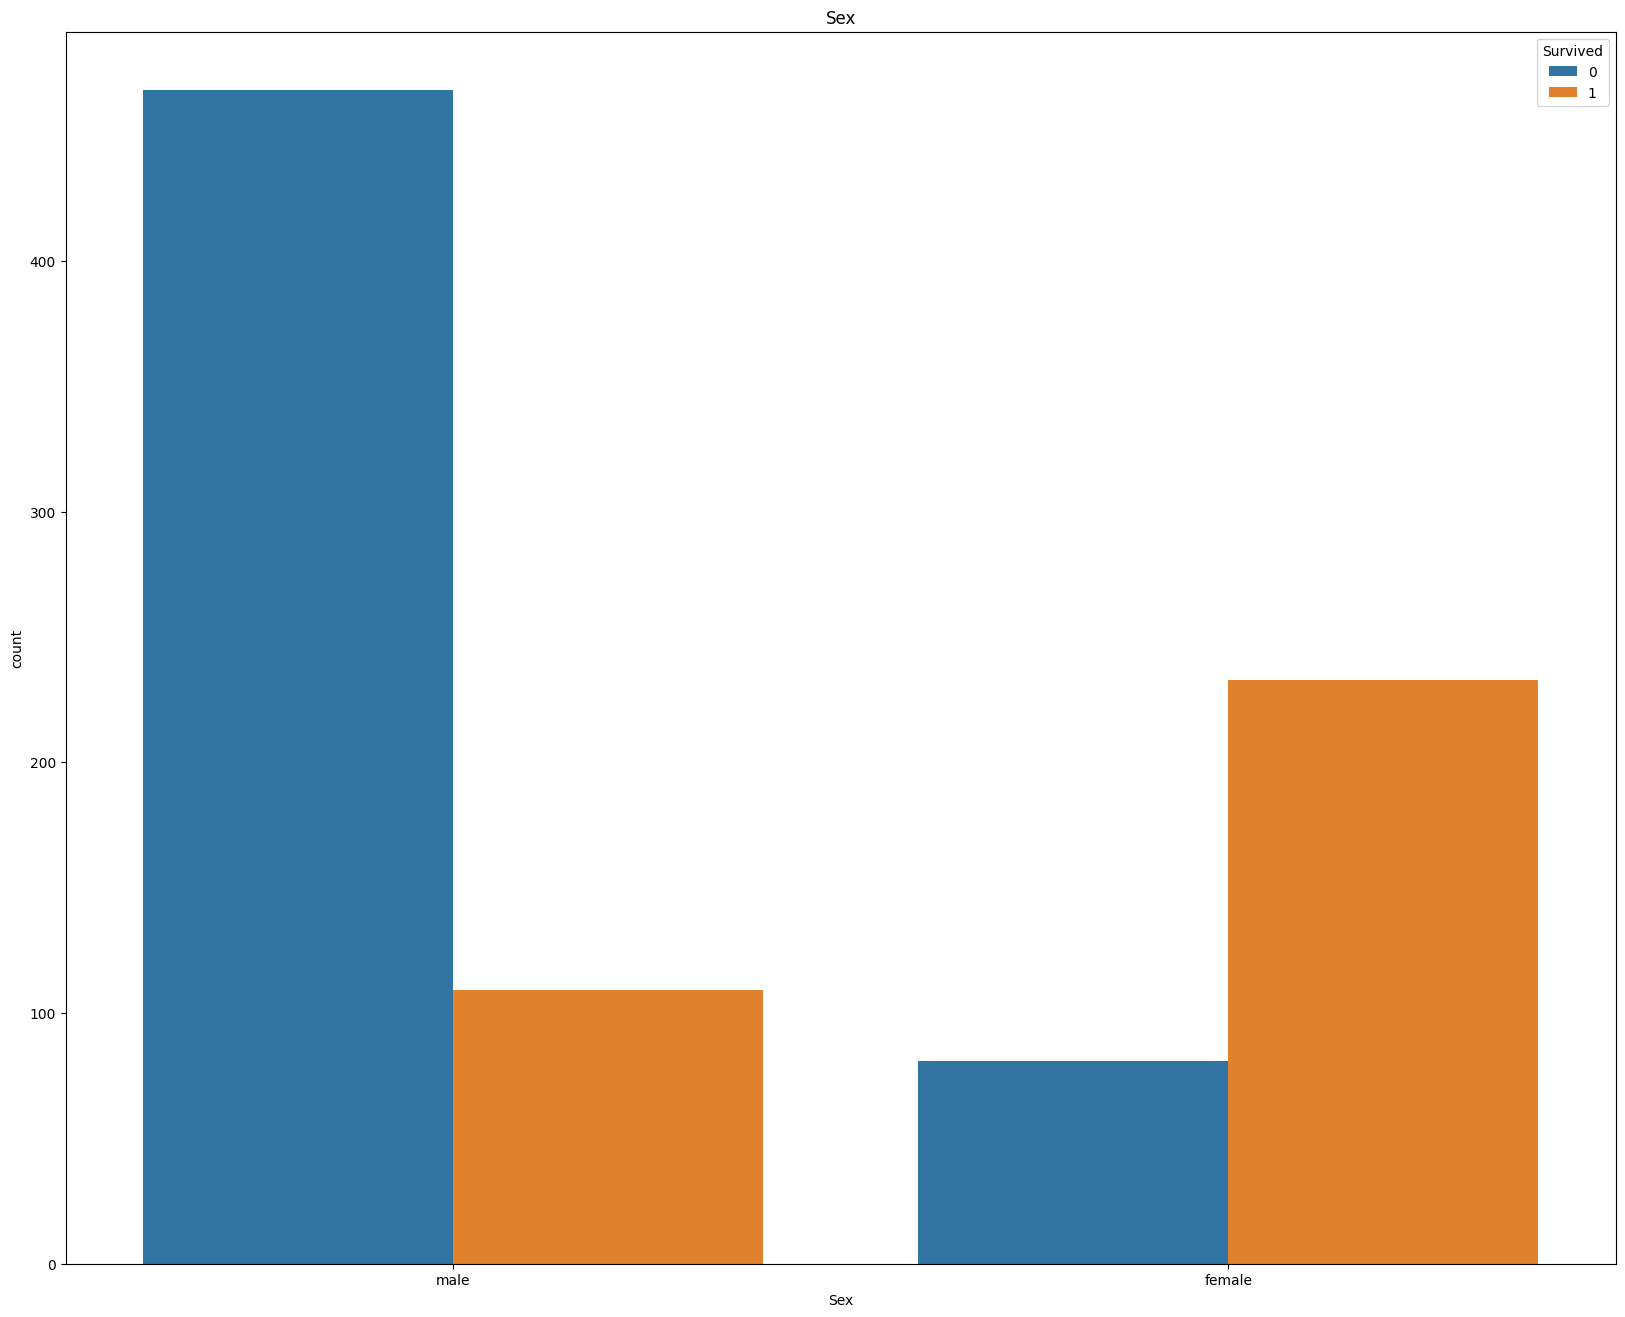

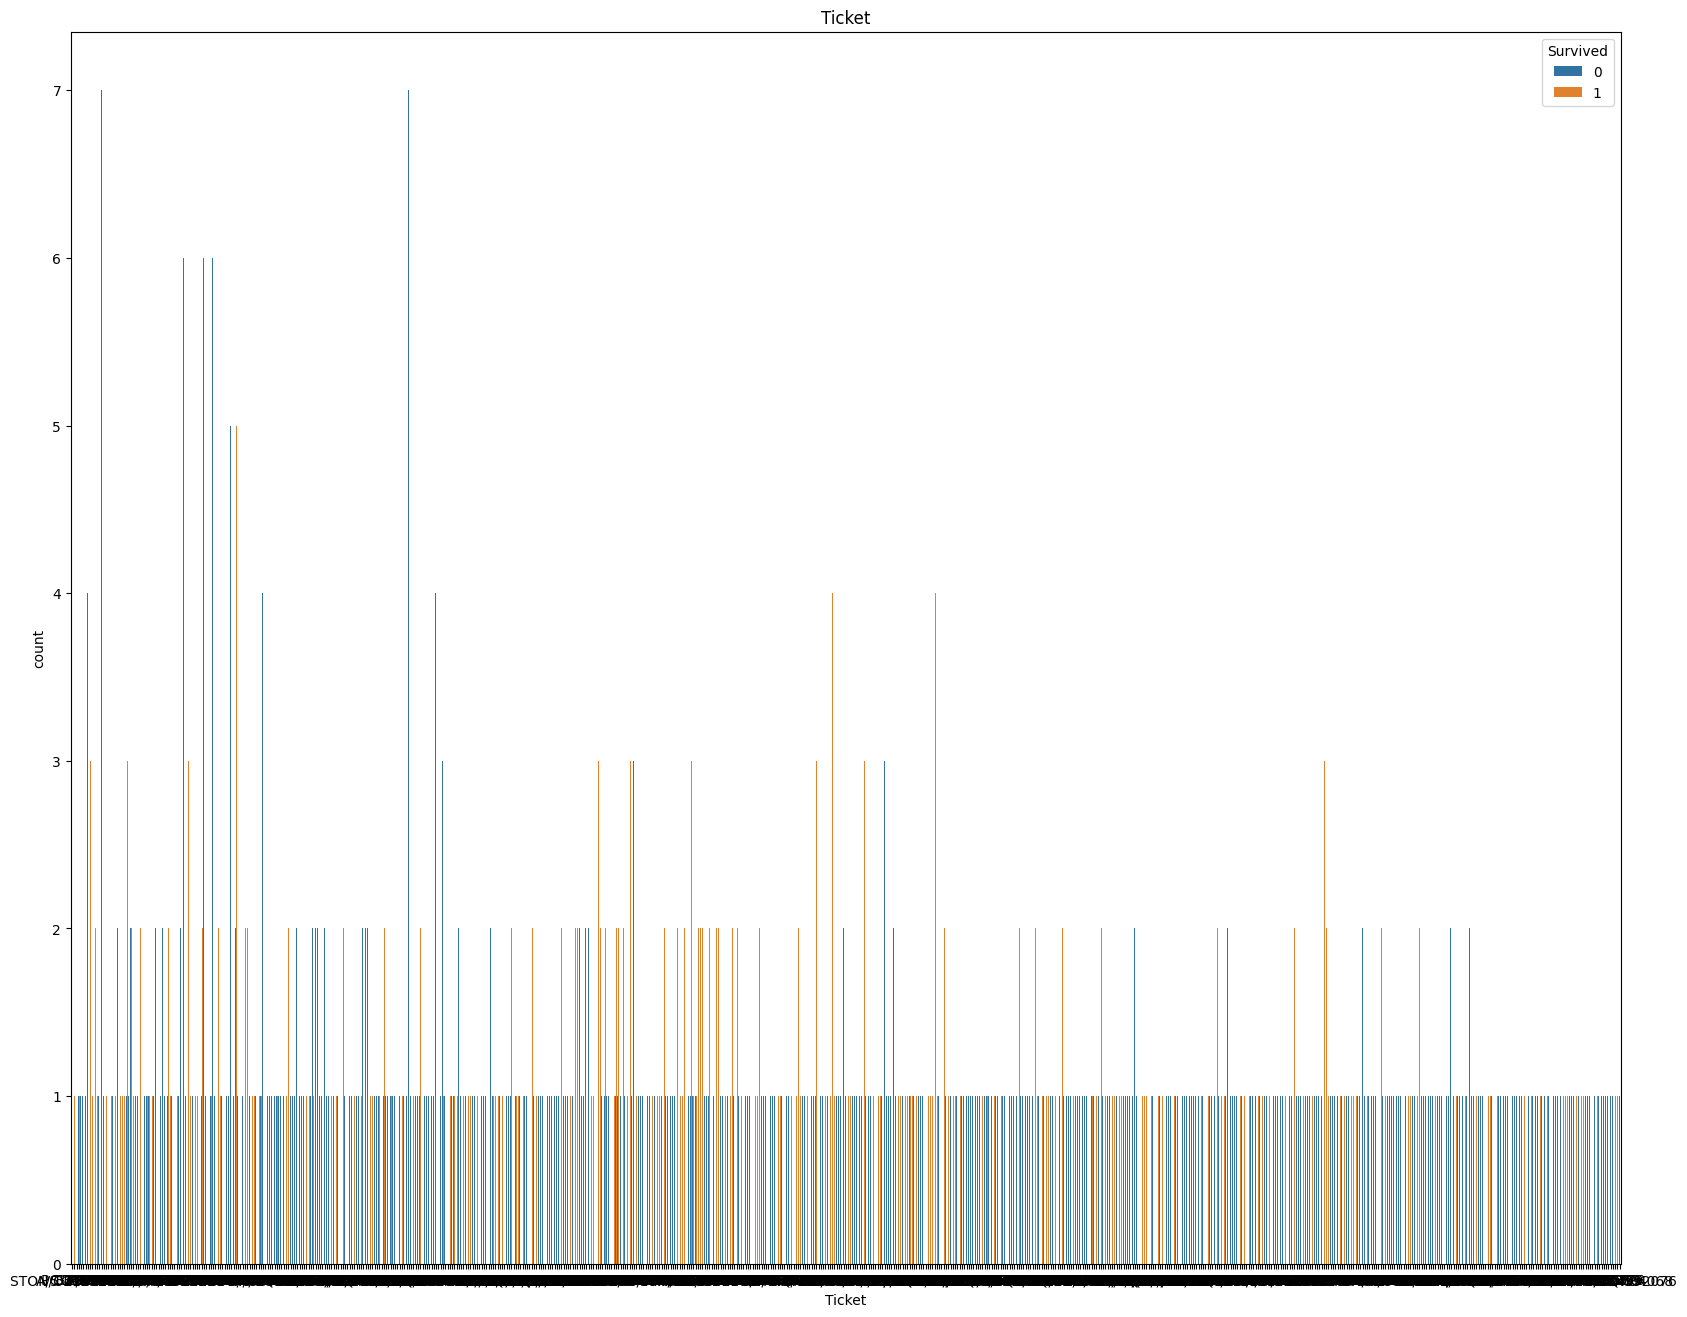

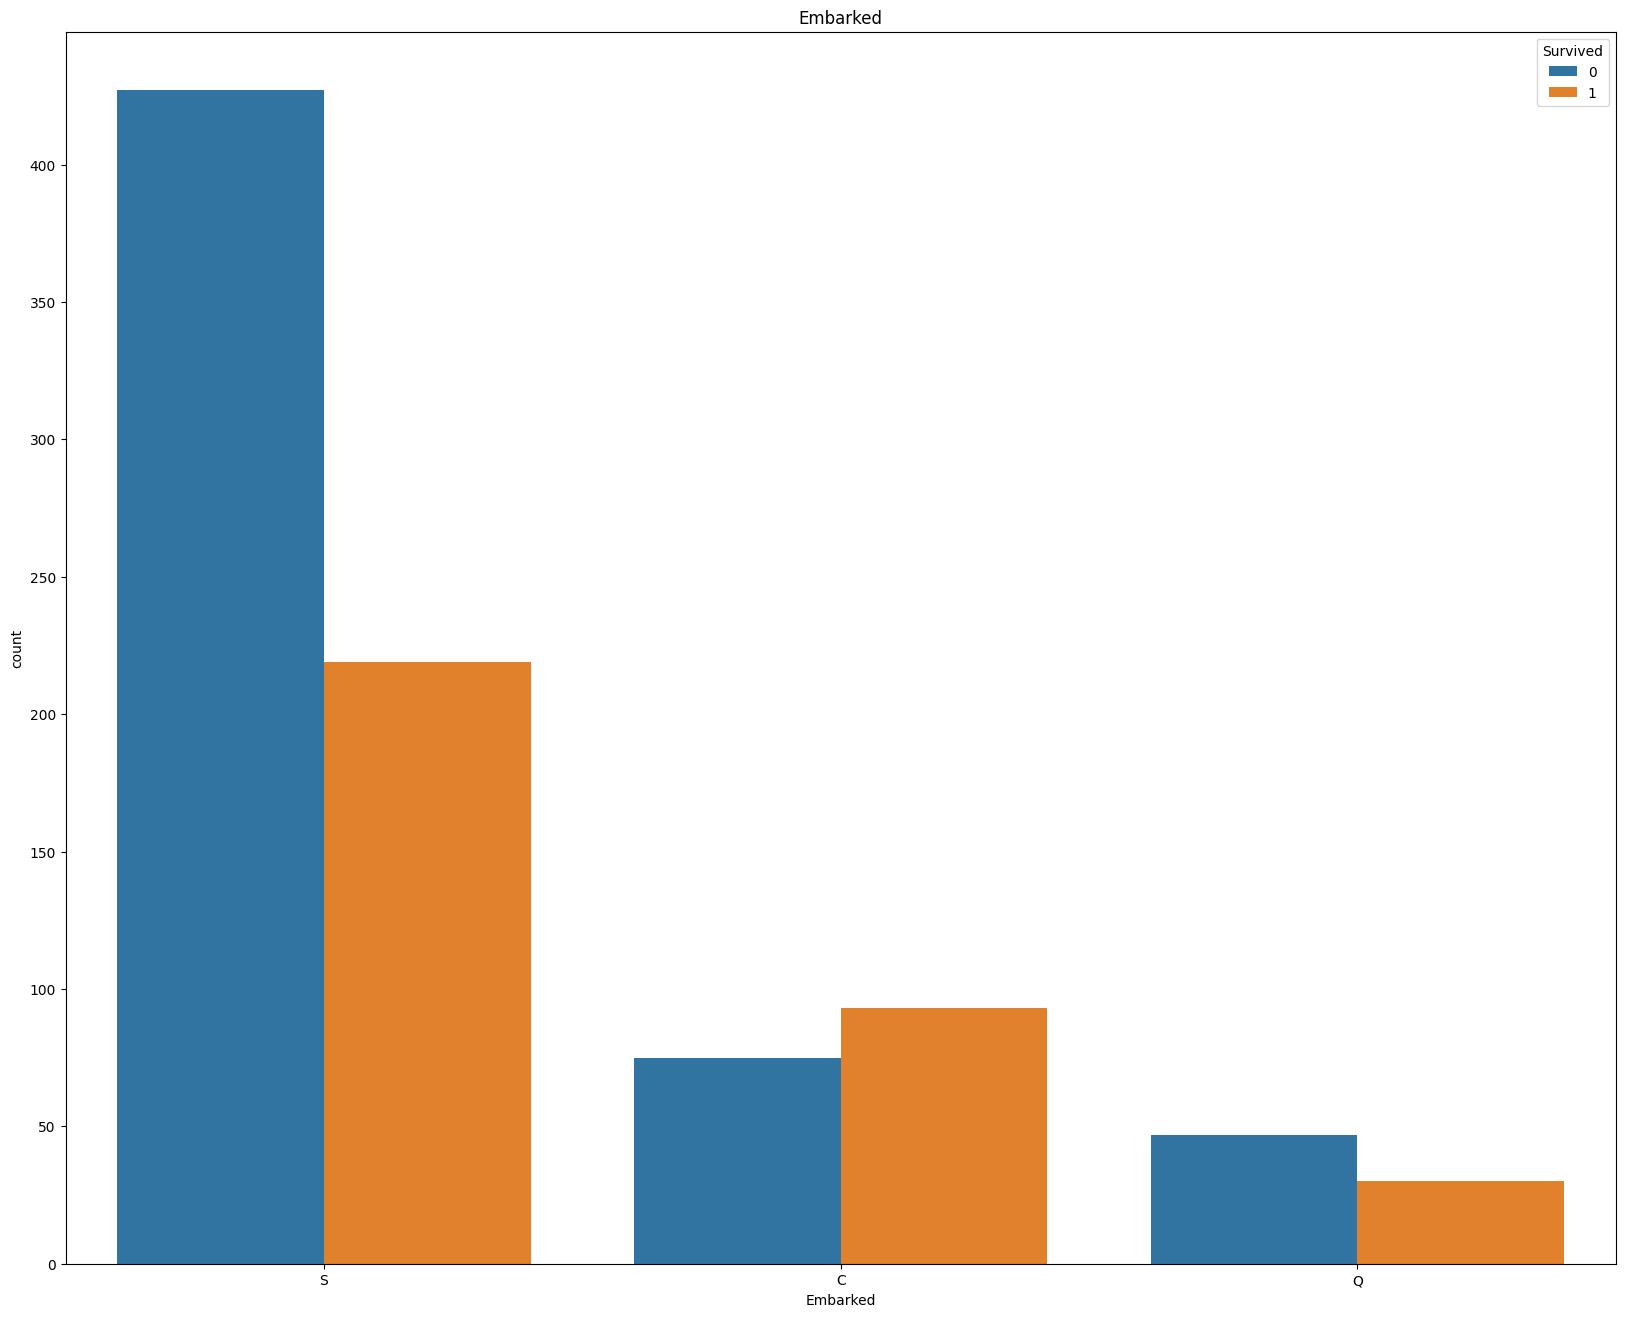

In [ ]:
print('字串部分，以Bar顯示，分類方式操作')
import matplotlib.pyplot as plt
import seaborn as sns
for cols in list4:
  plt.figure(figsize=(20,16))
  plt.title(cols)
  sns.countplot(x=cols,data=titanic,hue='Survived') #以Survived分類
  plt.savefig('bar2_'+cols+'.png') #儲存圖片
  plt.show()

In [ ]:
print('目前欄位數量:',titanic.shape) #查看目前欄位數量
print('圖表查看不容易，以文字方式呈現:')
for cols in list4:
  print('欄位名稱:',cols)
  print(titanic[cols].value_counts()) #計算各個分類的數量
  print()

目前欄位數量: (891, 11)
圖表查看不容易，以文字方式呈現:
欄位名稱: Name
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64

欄位名稱: Sex
Sex
male      577
female    314
Name: count, dtype: int64

欄位名稱: Ticket
Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877           

字串部分，以Bar顯示，分類方式操作


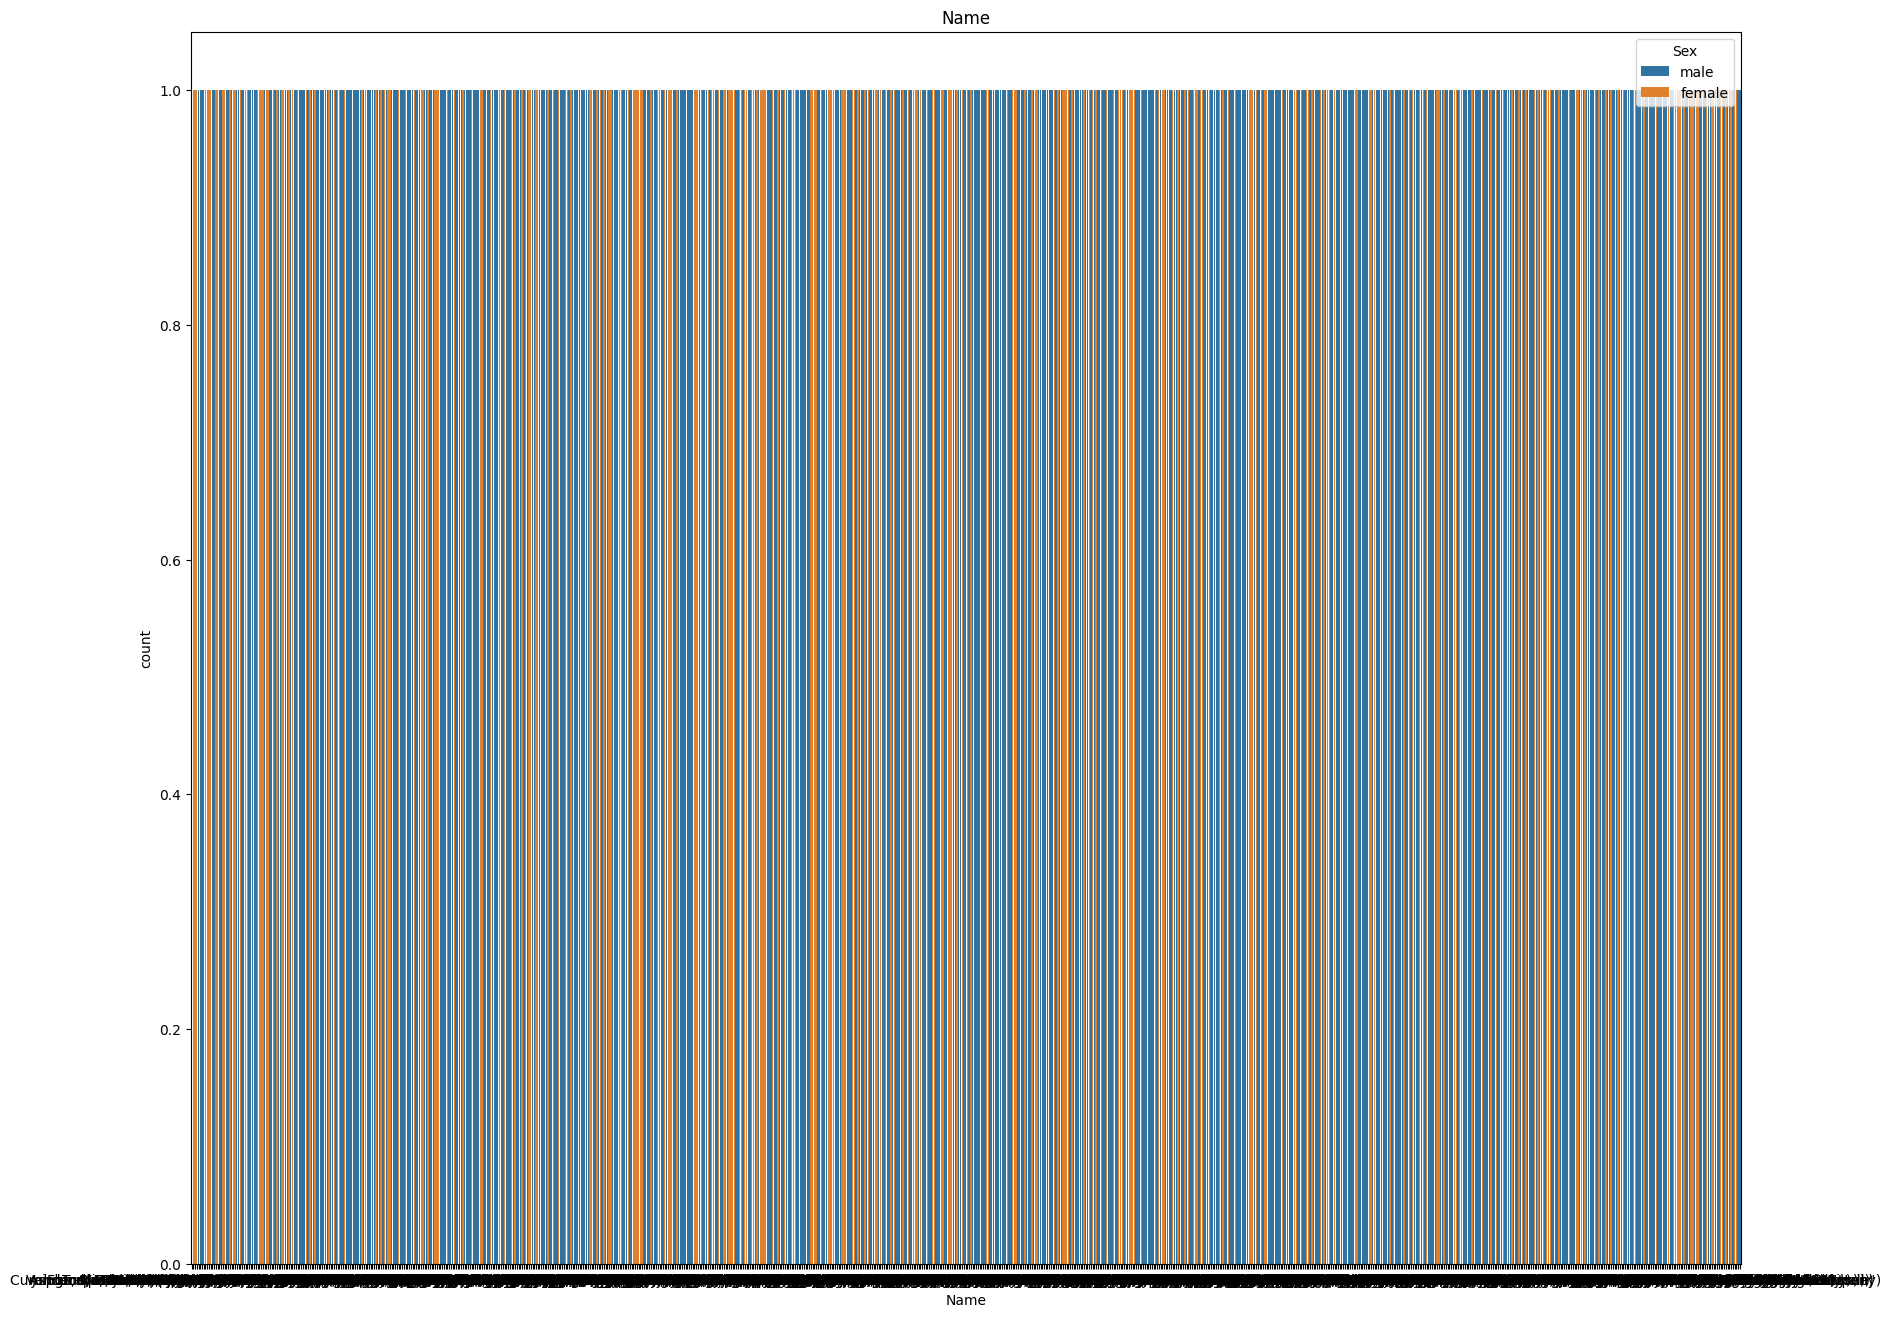

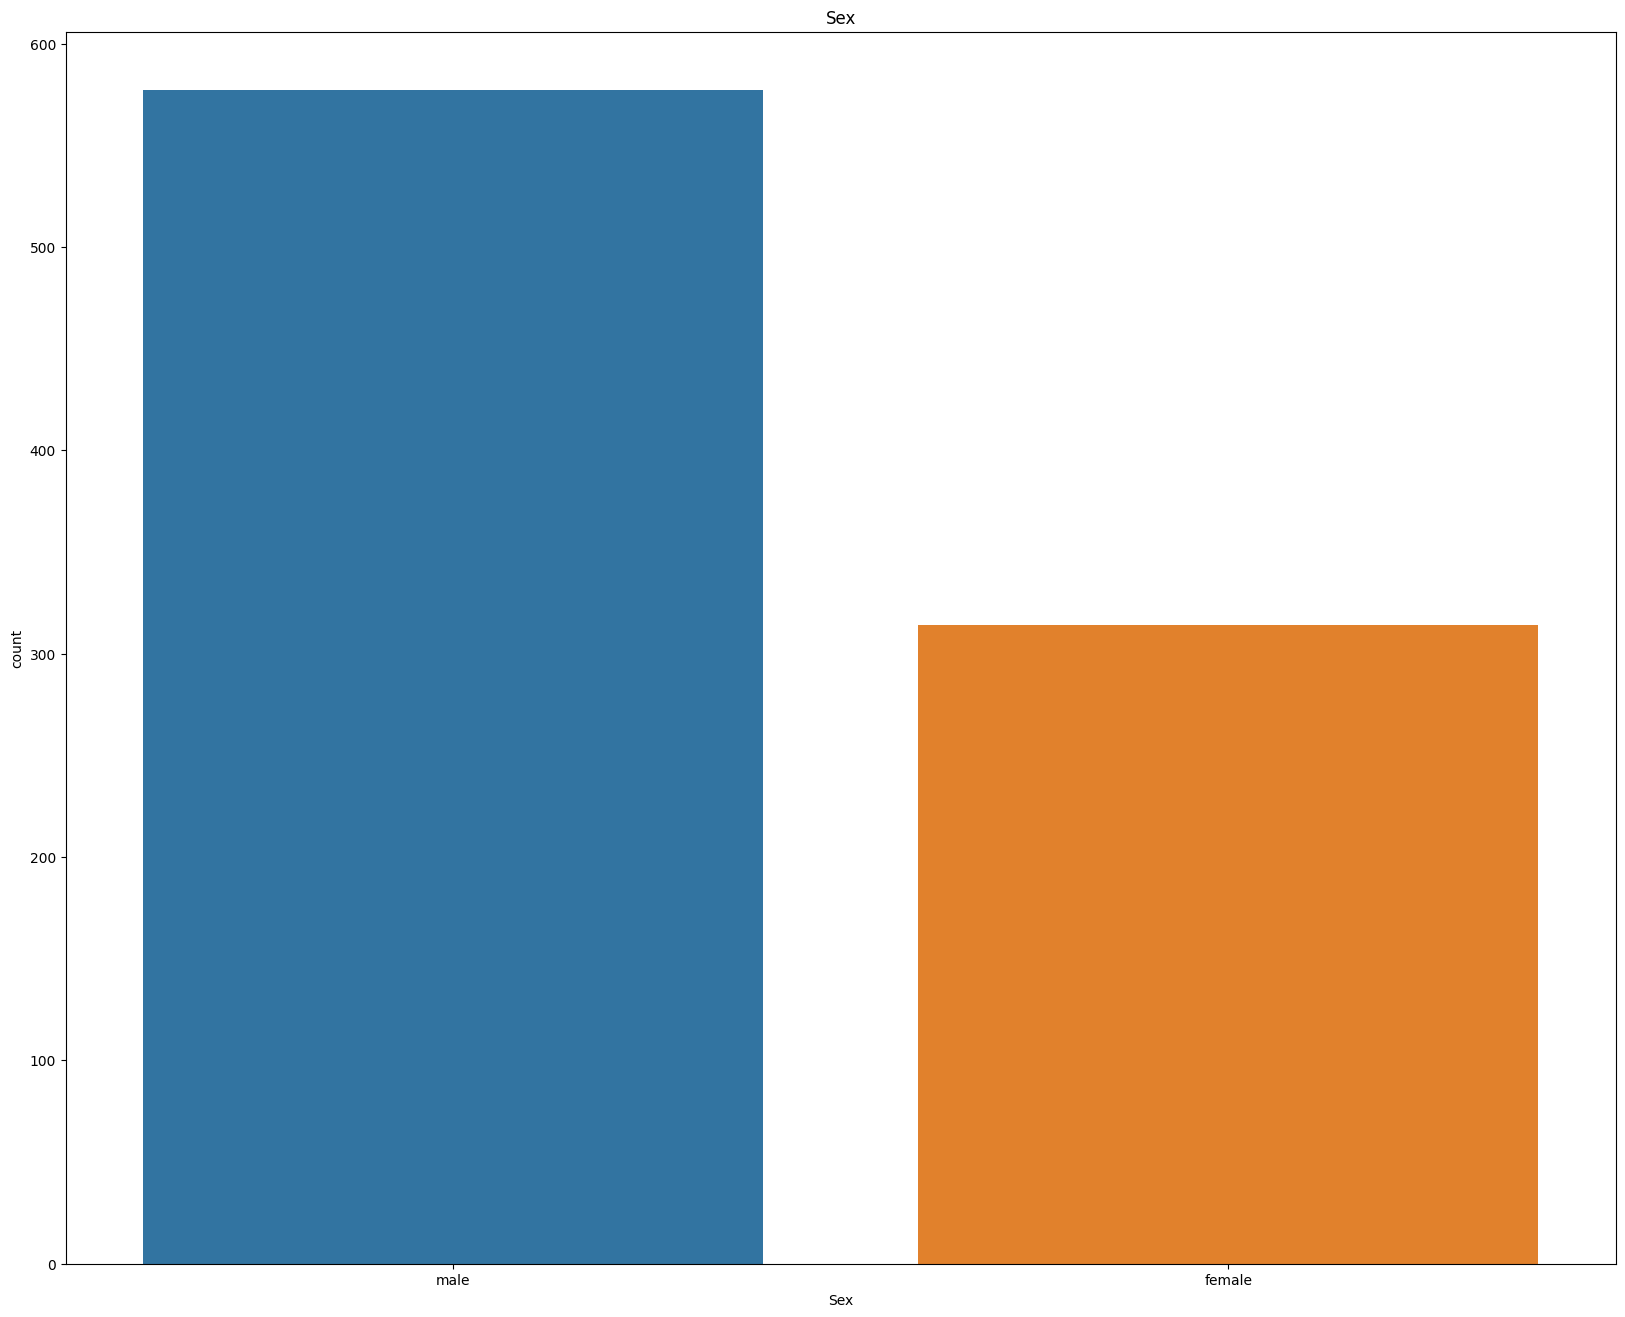

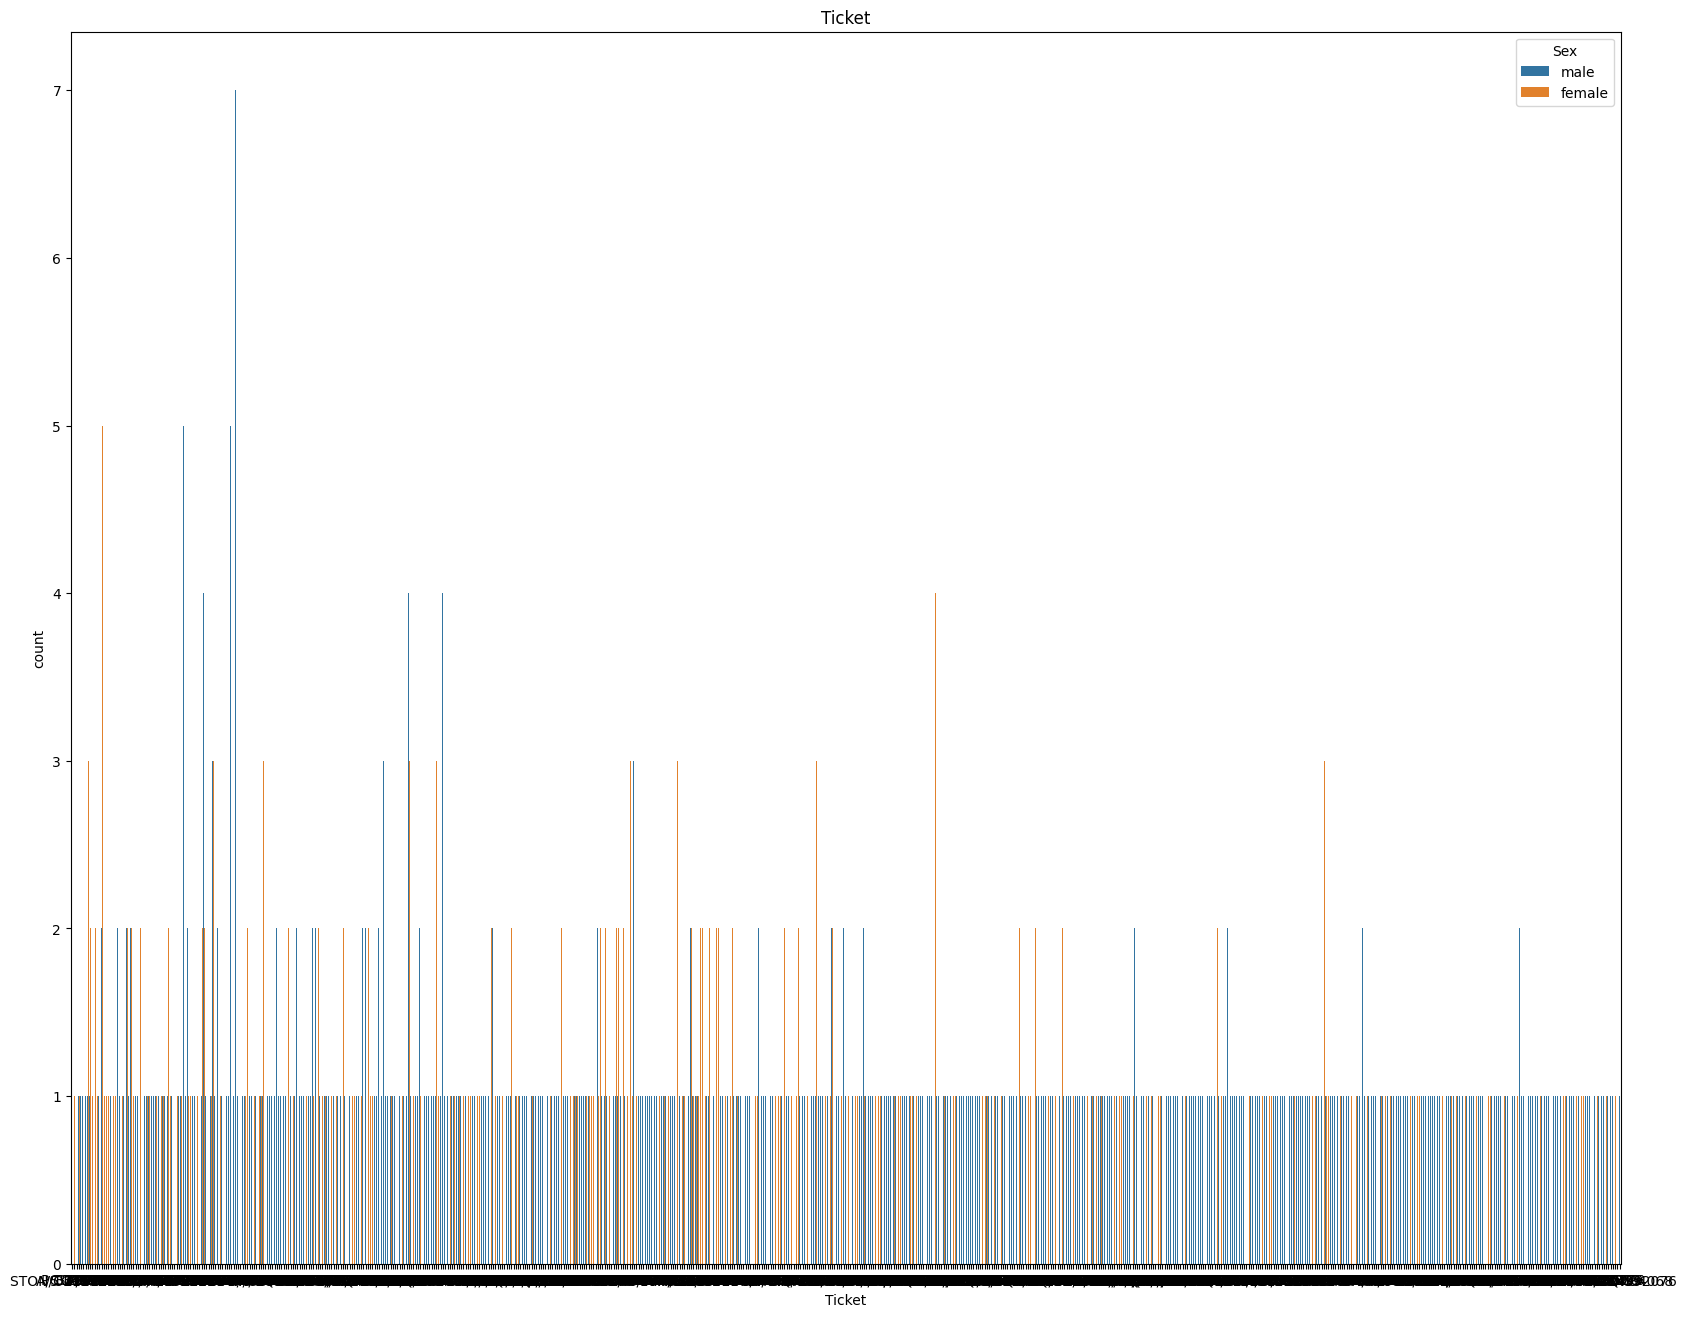

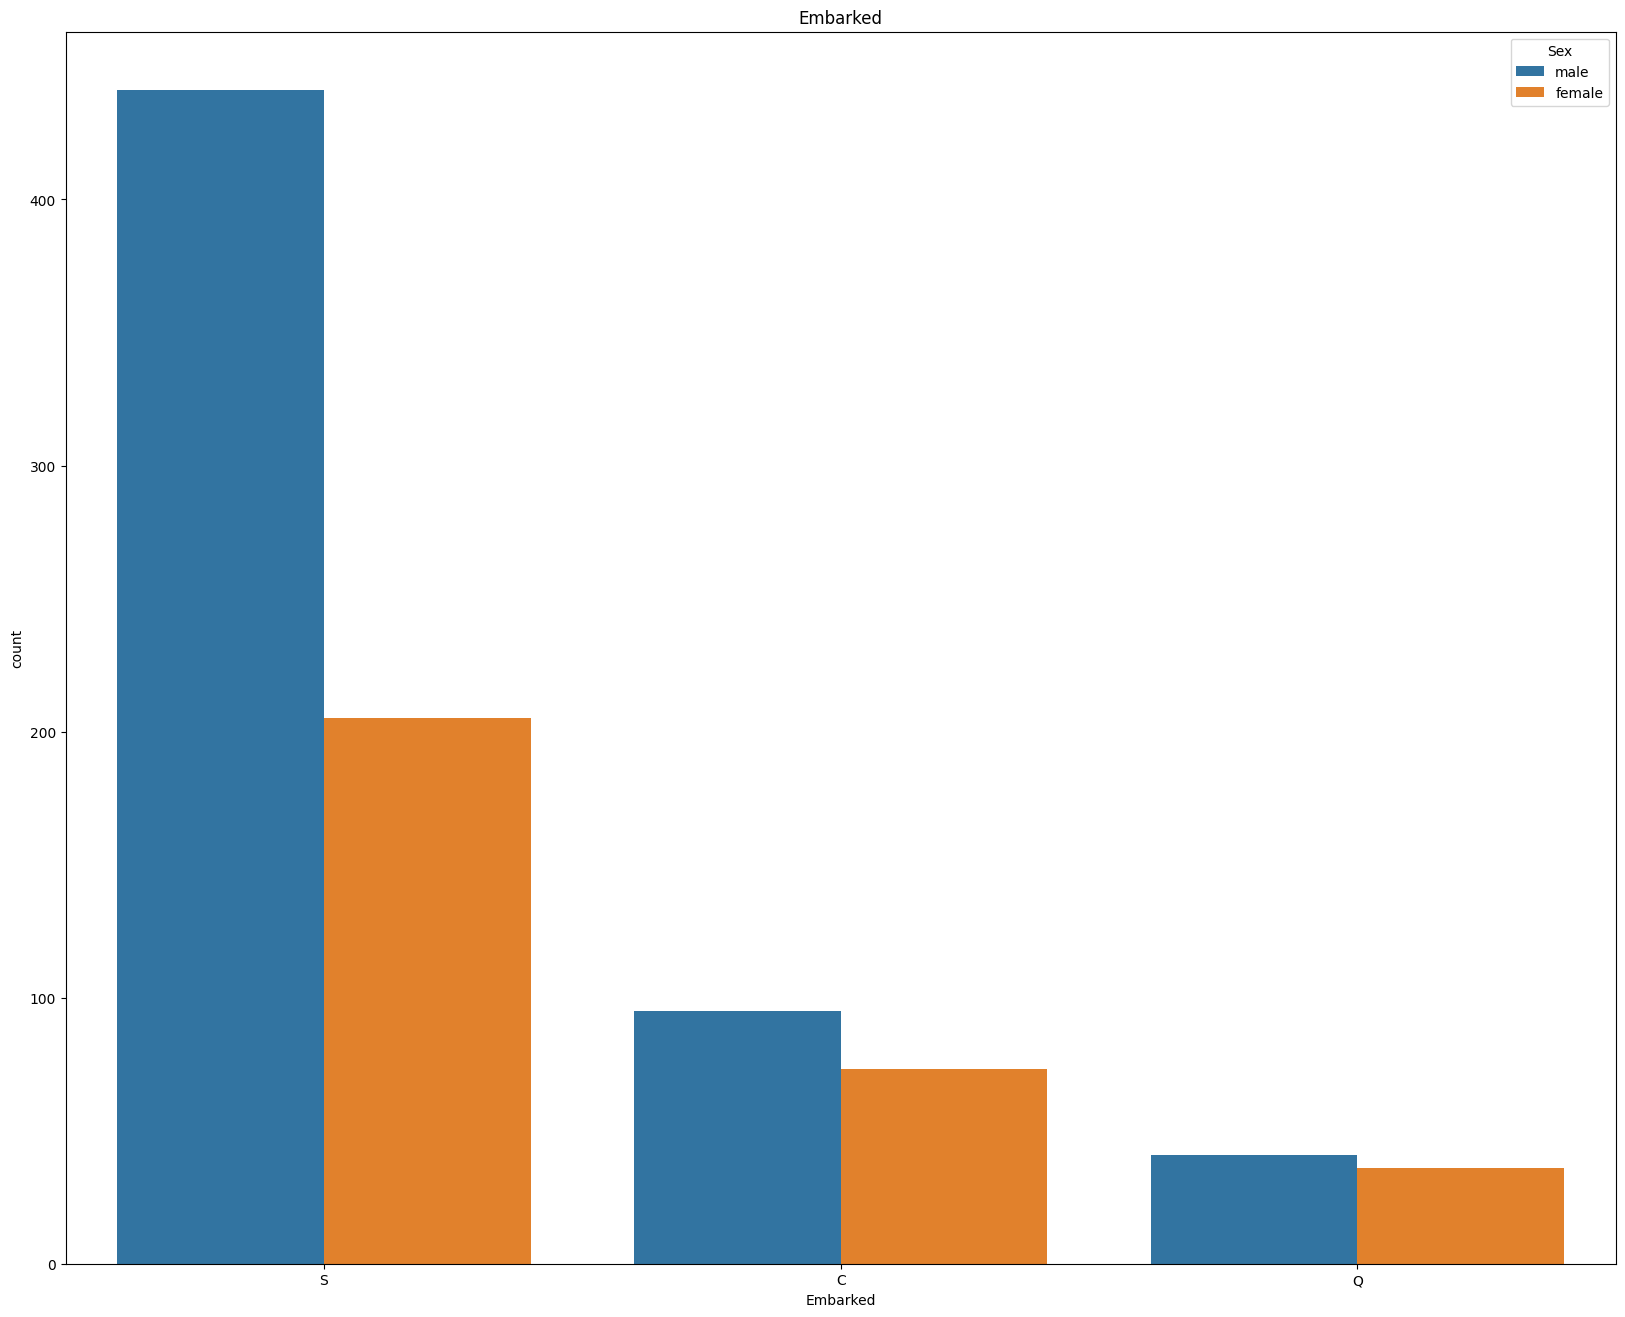

In [15]:
print('字串部分，以Bar顯示，分類方式操作')
import matplotlib.pyplot as plt
import seaborn as sns
for cols in list4:
  plt.figure(figsize=(20,16))
  plt.title(cols)
  sns.countplot(x=cols,data=titanic,hue='Sex')
  plt.savefig('bar3_'+cols+'.png')
  plt.show()

數值部分，以Hist顯示，加入分類
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


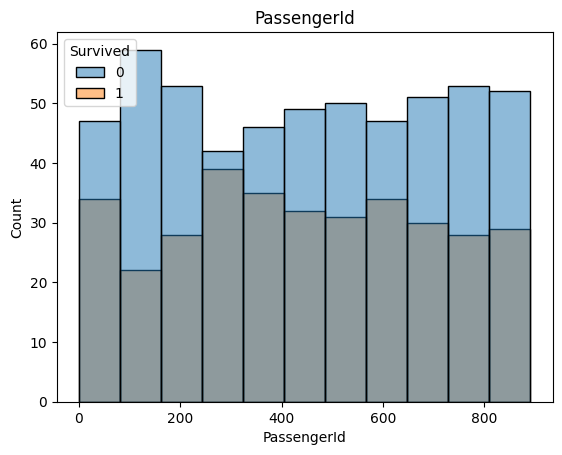

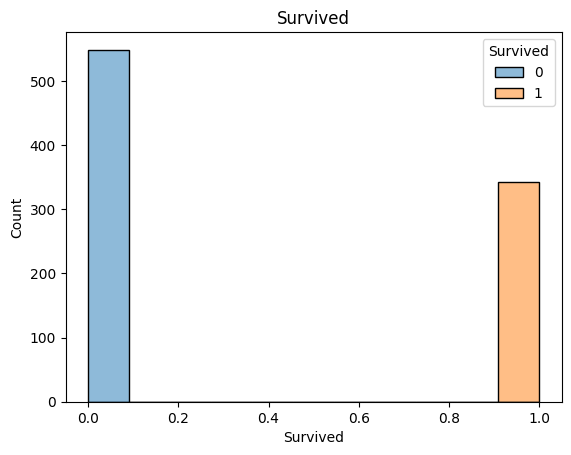

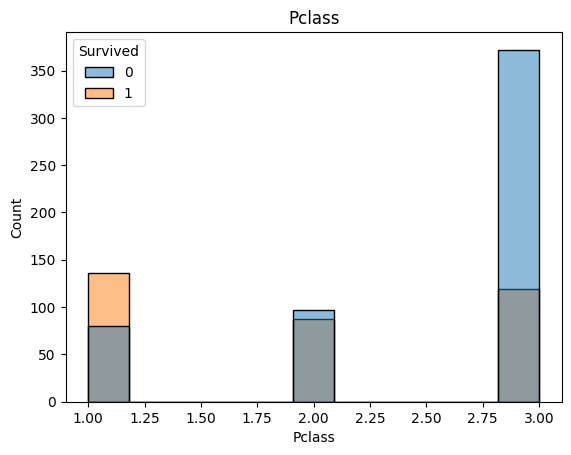

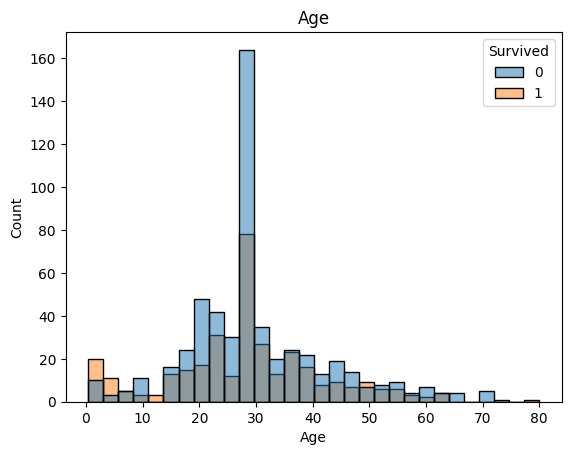

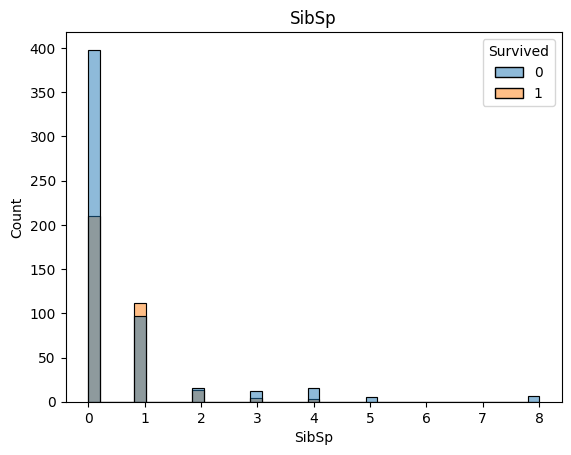

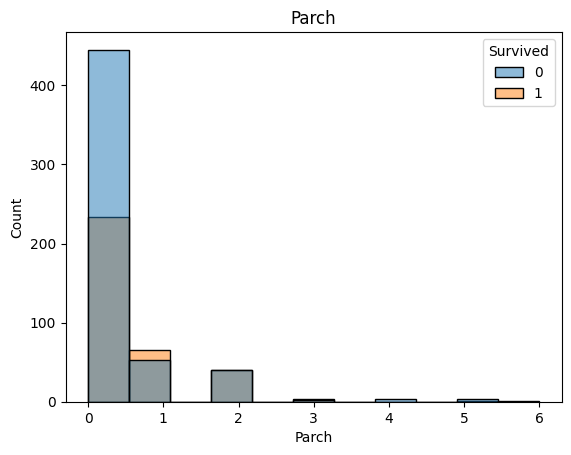

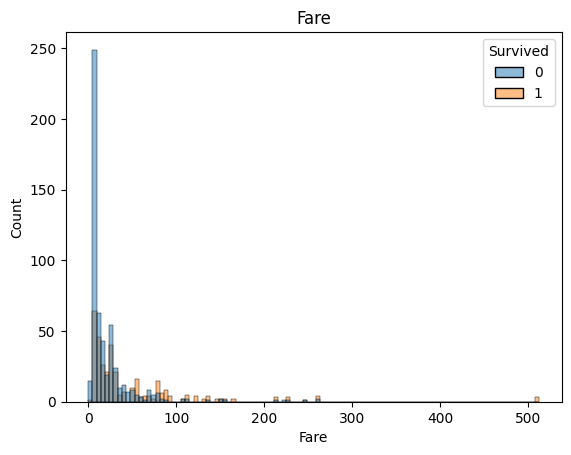

In [16]:
print('數值部分，以Hist顯示，加入分類')
import matplotlib.pyplot as plt
import seaborn as sns
print(list3)
for cols in list3:
  plt.title(cols)
  sns.histplot(x=cols,data=titanic,hue='Survived')
  plt.savefig('hist2_'+cols+'.png')
  plt.show()

數值部分，以boxplot顯示，分類部分操作
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


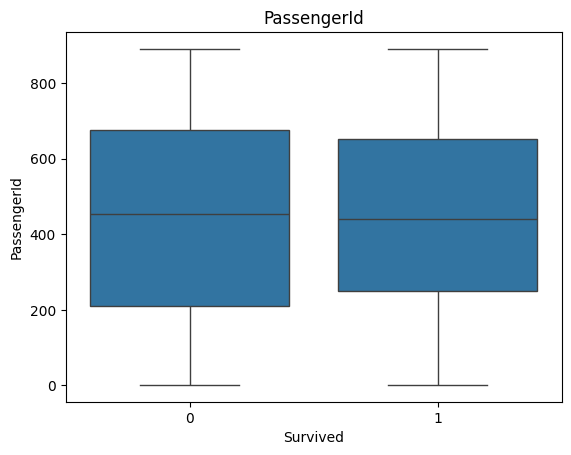

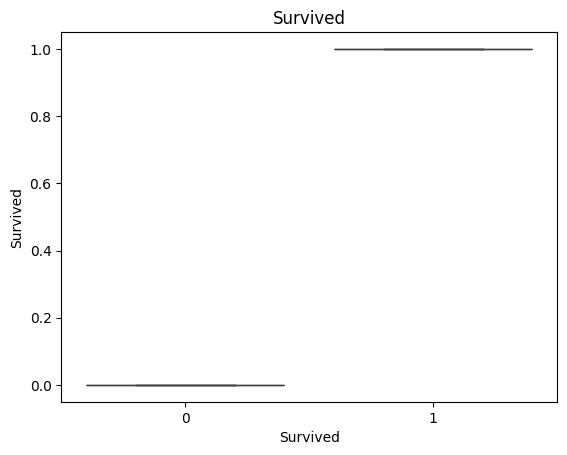

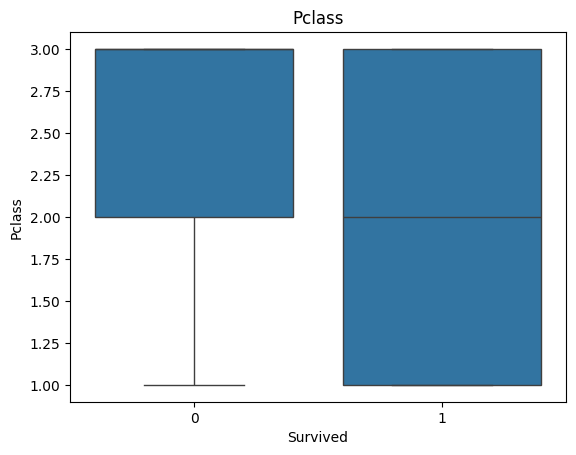

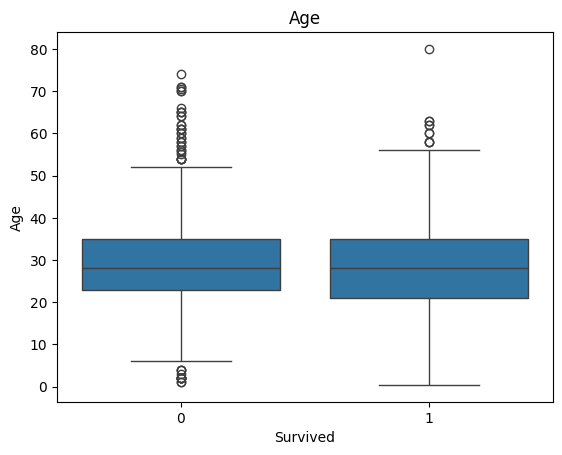

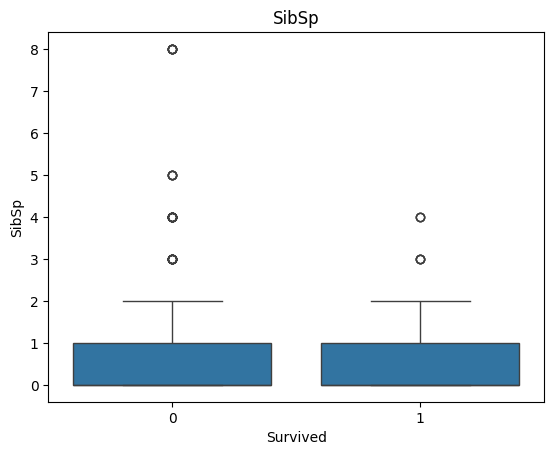

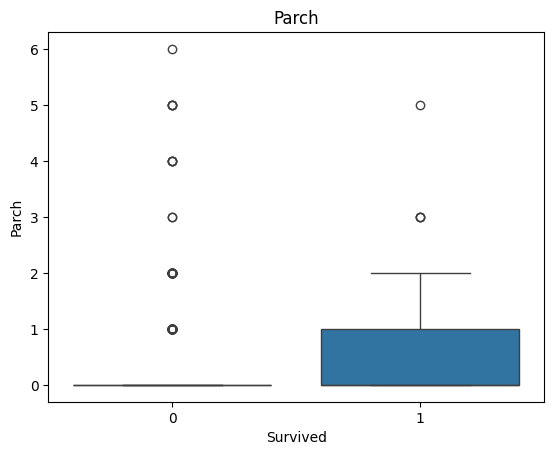

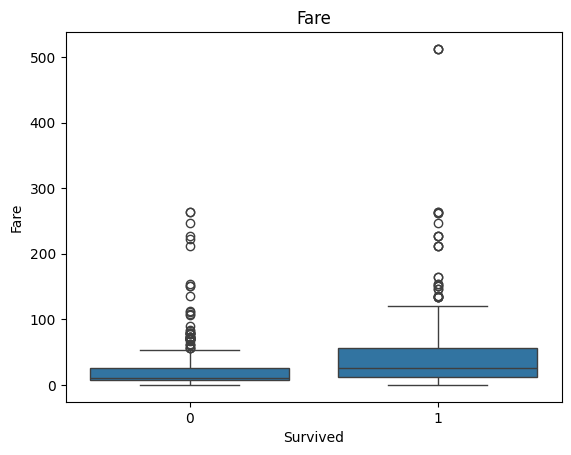

In [17]:
print('數值部分，以boxplot顯示，分類部分操作')
import matplotlib.pyplot as plt
import seaborn as sns
print(list3)
for cols in list3:
  plt.title(cols)
  sns.boxplot(x='Survived',y=cols,data=titanic)
  plt.savefig('box2_'+cols+'.png')
  plt.show()

數值部分，以scatter顯示，加入分類
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


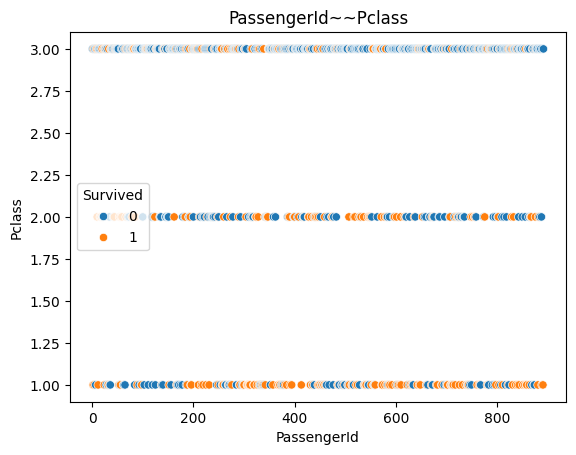

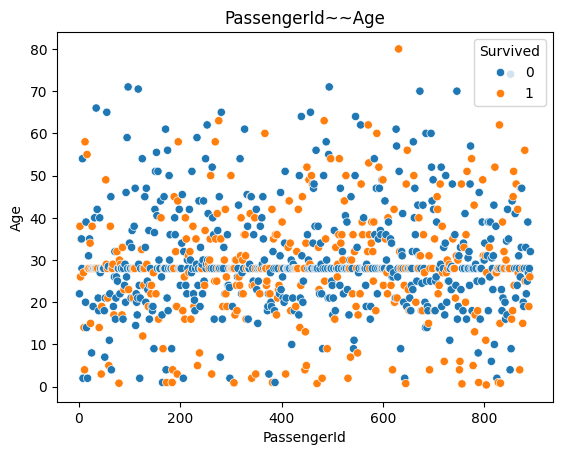

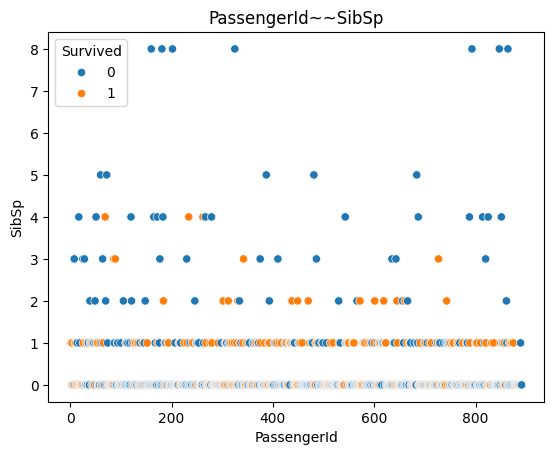

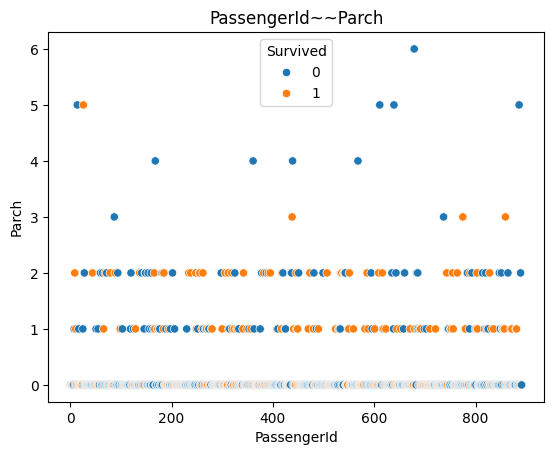

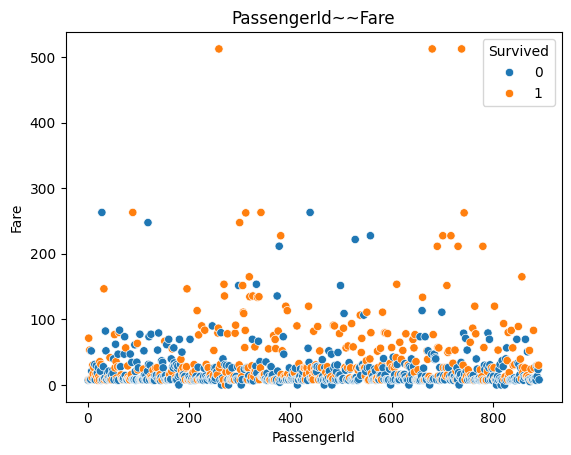

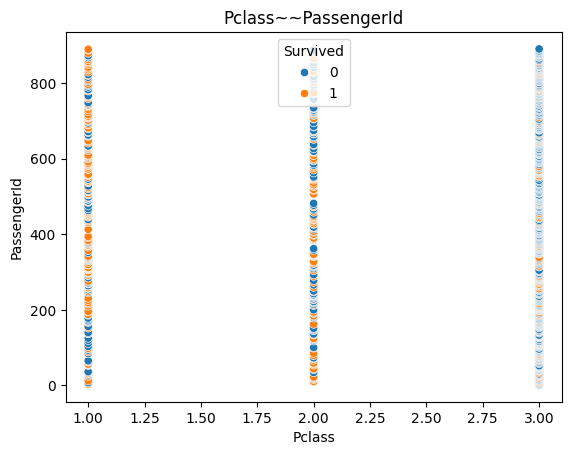

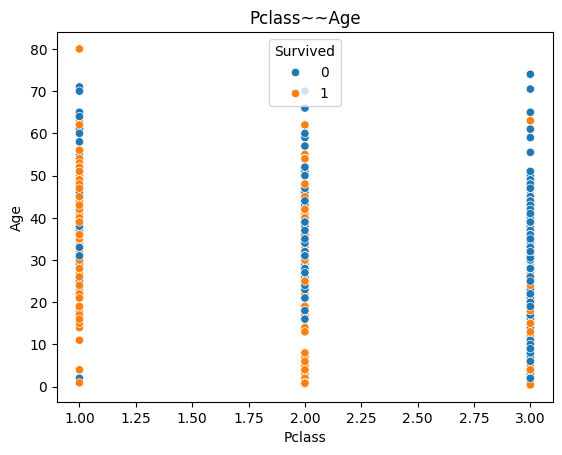

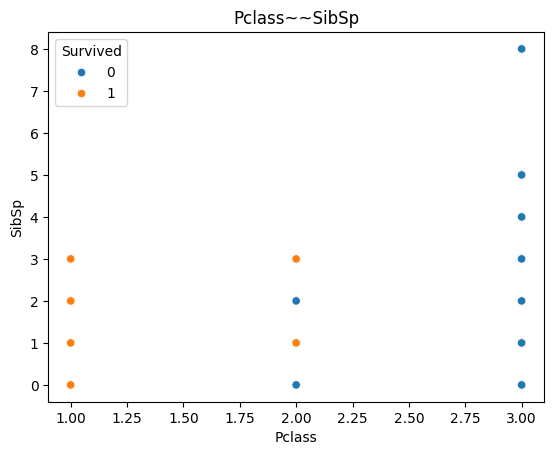

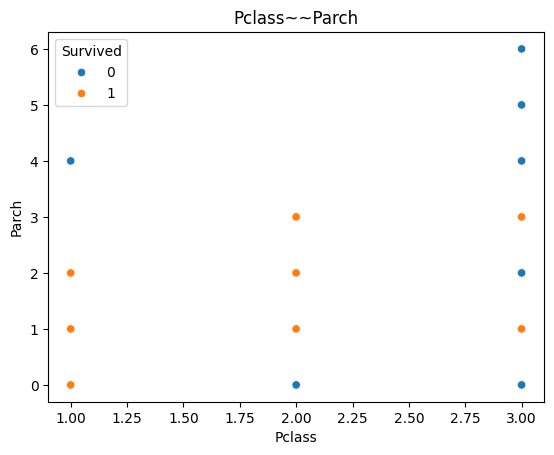

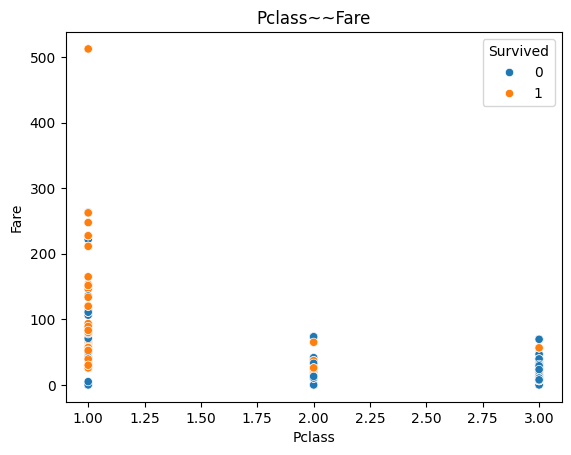

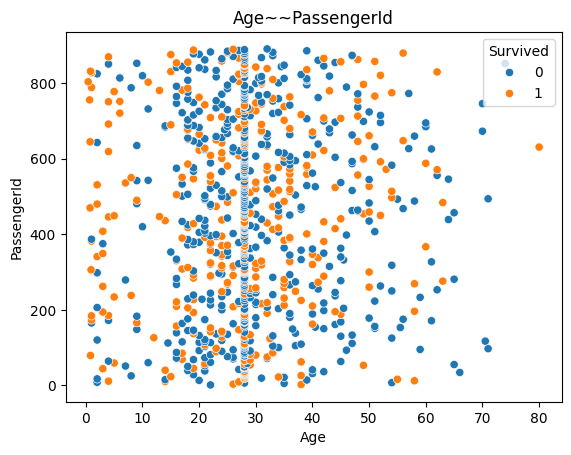

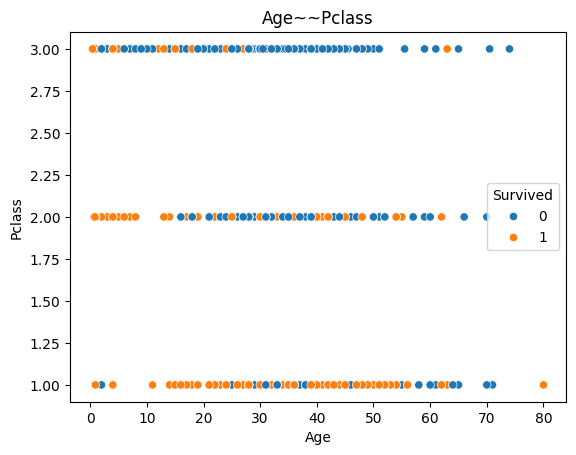

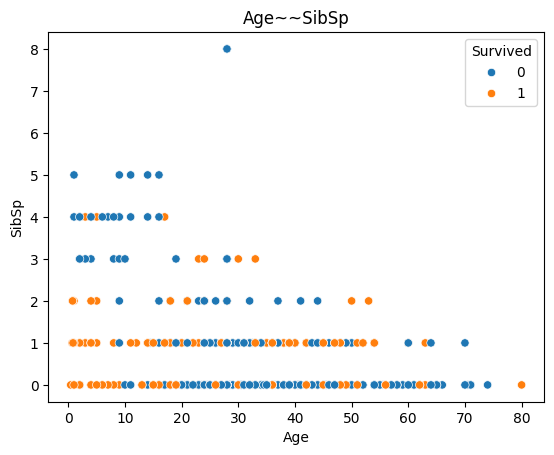

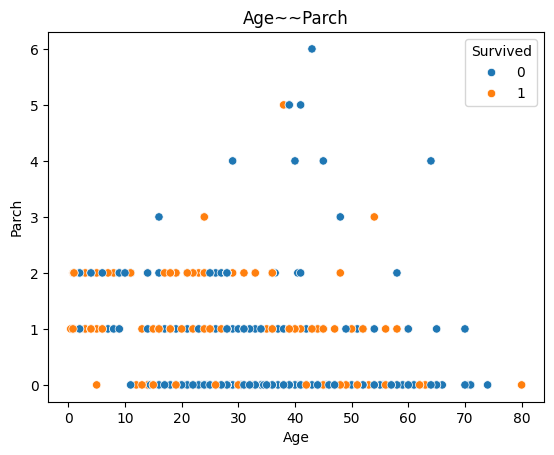

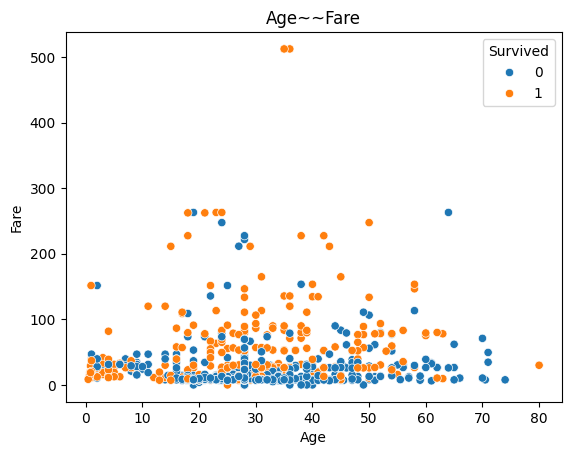

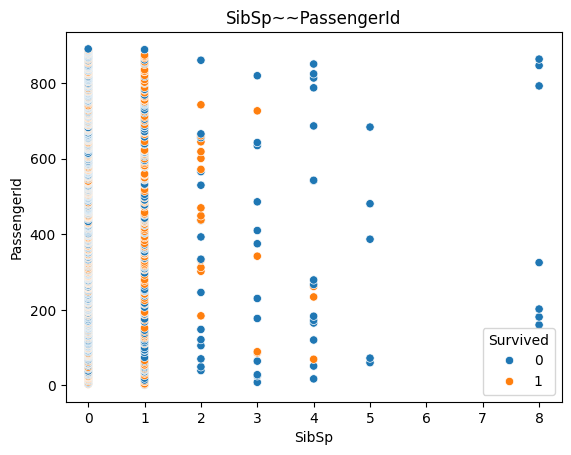

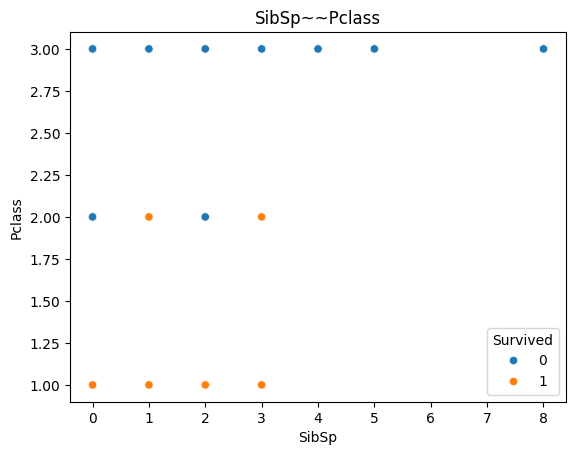

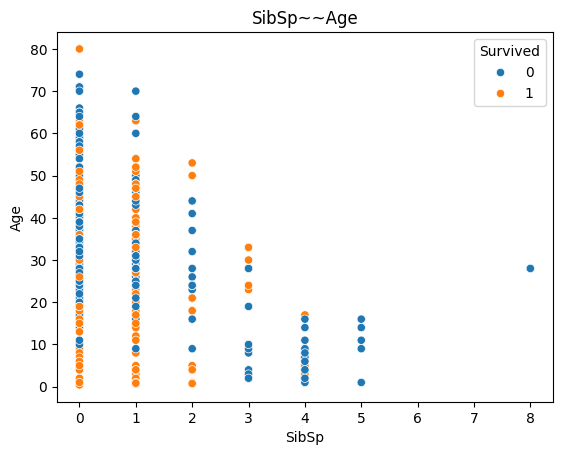

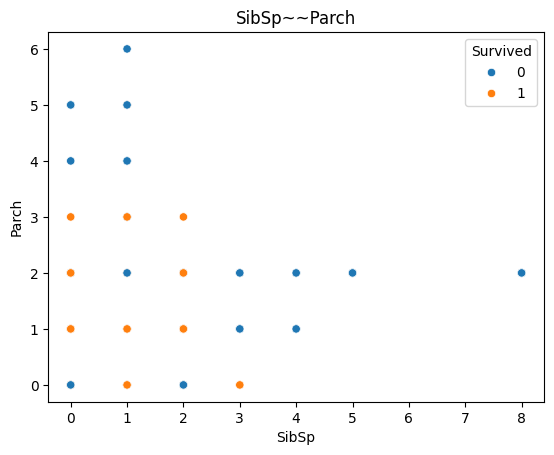

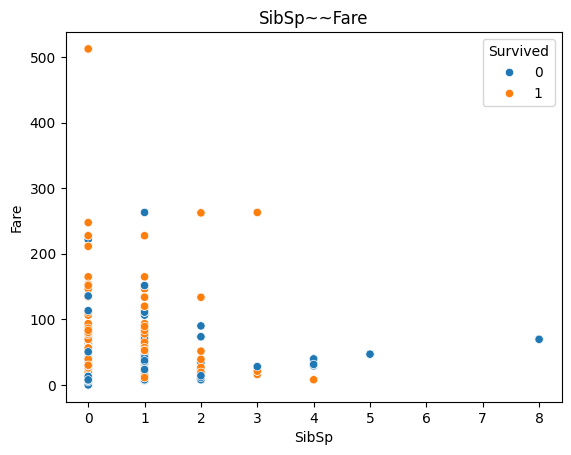

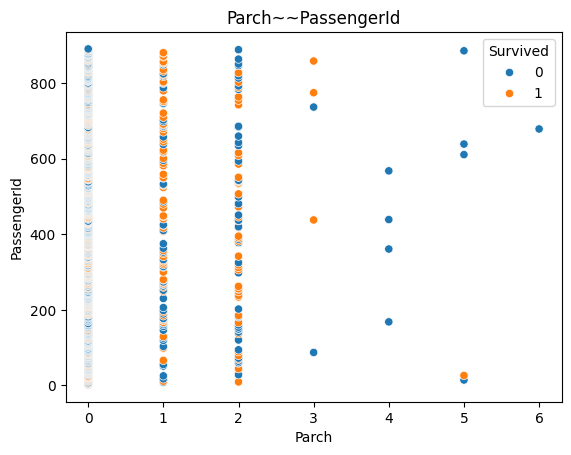

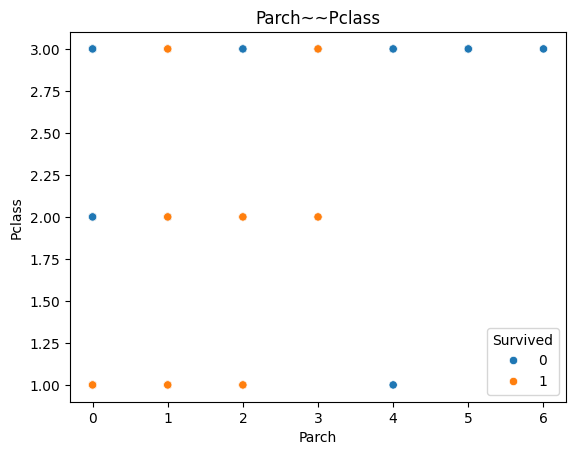

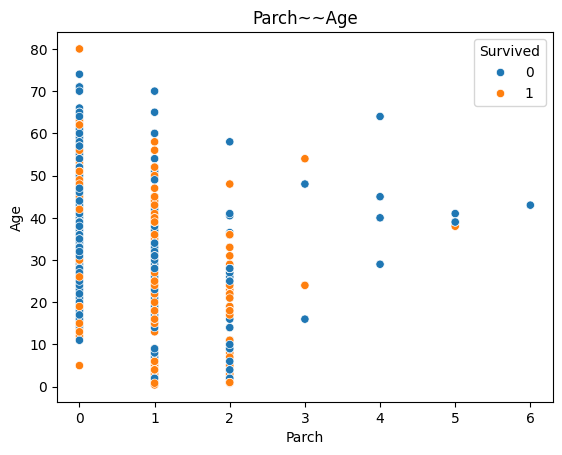

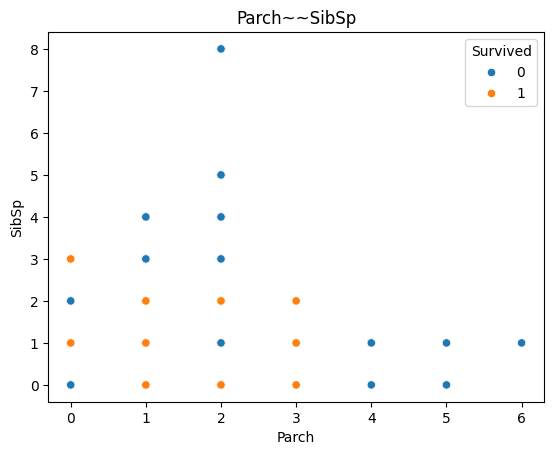

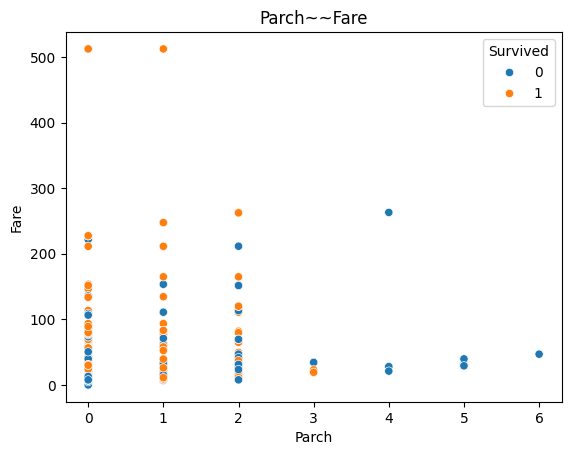

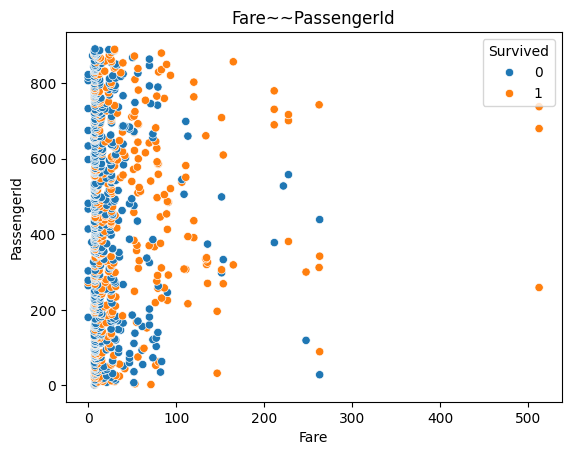

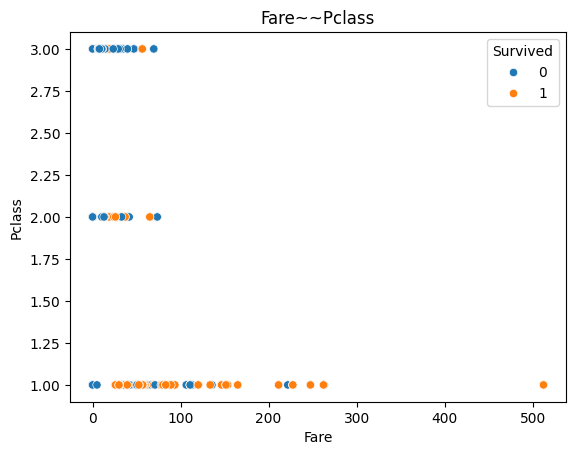

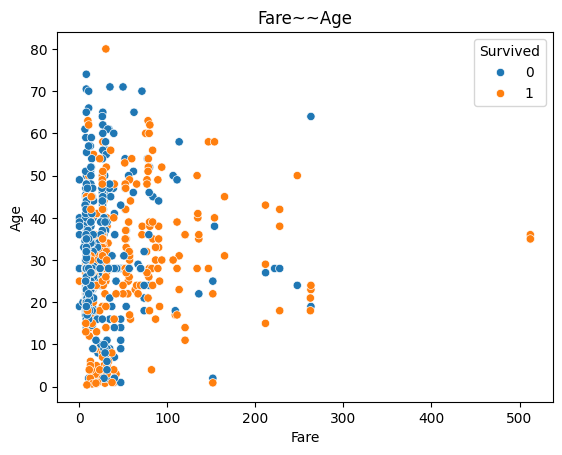

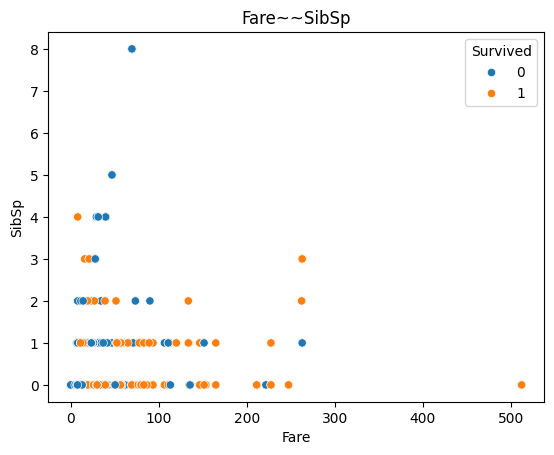

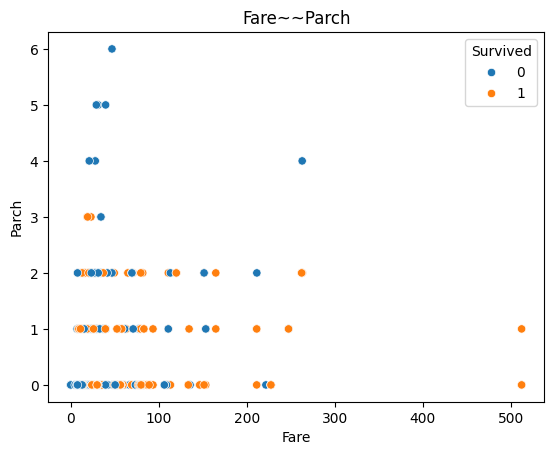

In [ ]:
print('數值部分，以scatter顯示，加入分類')
import matplotlib.pyplot as plt
print(list3)
for i in list3:
  for j in list3:
    if i==j:
      continue
    if i=='Survived' or j=='Survived':
      continue
    #if i=='bad_credit' or j=='bad_credit':
      #continue
    sns.scatterplot(x=i,y=j,data=titanic,hue='Survived')
    plt.title(i+'~~'+j)
    plt.savefig('scatter2_'+i+'_'+j+'.png')
    plt.show()

In [23]:
print('隨機森林挑選出來的欄位代表分類的時候是最單純的沒有雜質')
print('需要載入的套件在此設定')
print('2資料切割，採取隨機方式')
from sklearn.model_selection import train_test_split
print('3產生模型物件、迴歸與分類是不同')
from sklearn.ensemble import RandomForestClassifier
print('4訓練模型')
print('5與6、模型的儲存與載入，模型訓練的好可以儲存，不一定每次都要訓練後預估')
import joblib
print('8、模型進行評估，才知道模型訓練後好或不好')
print('評估於迴歸與分類是不同')
#1、X與y資料準備
print('訓練資料的準備')
#print(list3)
data1=titanic[list3]
print(data1.head())
x=titanic[['PassengerId','Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
#x=titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y=titanic['Survived']
#2、資料切割
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
#3、產生模型物件
model1=RandomForestClassifier(n_estimators=100)
#4、模型物件進行訓練
model1.fit(x_train,y_train)
#5、儲存訓練後的模型
joblib.dump(model1,'model1.pkl')
#6、載入儲存後的模型檔案
model1=joblib.load('model1.pkl')
#9、查看欄位重要性
feature1=model1.feature_importances_
print(feature1)
#10、將欄位重要性儲存在DataFrame，然後再轉換為網頁方式顯示
import_df=pd.DataFrame(feature1,index=x_train.columns,columns=['importance'])
import_df.to_html('import_df.html')


隨機森林挑選出來的欄位代表分類的時候是最單純的沒有雜質
需要載入的套件在此設定
2資料切割，採取隨機方式
3產生模型物件、迴歸與分類是不同
4訓練模型
5與6、模型的儲存與載入，模型訓練的好可以儲存，不一定每次都要訓練後預估
8、模型進行評估，才知道模型訓練後好或不好
評估於迴歸與分類是不同
訓練資料的準備
   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500
[0.29067988 0.08274503 0.24462308 0.05288498 0.03853262 0.29053441]


In [24]:
print('隨機森林挑選出來的欄位代表分類的時候是最單純的沒有雜質')
print('需要載入的套件在此設定')
print('2資料切割，採取隨機方式')
from sklearn.model_selection import train_test_split
print('3產生模型物件、迴歸與分類是不同')
from sklearn.ensemble import RandomForestClassifier
print('4訓練模型')
print('5與6、模型的儲存與載入，模型訓練的好可以儲存，不一定每次都要訓練後預估')
import joblib
print('8、模型進行評估，才知道模型訓練後好或不好')
print('評估於迴歸與分類是不同')
#1、X與y資料準備
print('訓練資料的準備')
#print(list3)
data1=titanic[list3]
print(data1.head())
#x=titanic[['PassengerId','Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
x=titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y=titanic['Survived']
#2、資料切割
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
#3、產生模型物件
model1=RandomForestClassifier(n_estimators=100)
#4、模型物件進行訓練
model1.fit(x_train,y_train)
#5、儲存訓練後的模型
joblib.dump(model1,'model1.pkl')
#6、載入儲存後的模型檔案
model1=joblib.load('model1.pkl')
#9、查看欄位重要性
feature1=model1.feature_importances_
print(feature1)
#10、將欄位重要性儲存在DataFrame，然後再轉換為網頁方式顯示
import_df=pd.DataFrame(feature1,index=x_train.columns,columns=['importance'])
import_df.to_html('import_df.html')


隨機森林挑選出來的欄位代表分類的時候是最單純的沒有雜質
需要載入的套件在此設定
2資料切割，採取隨機方式
3產生模型物件、迴歸與分類是不同
4訓練模型
5與6、模型的儲存與載入，模型訓練的好可以儲存，不一定每次都要訓練後預估
8、模型進行評估，才知道模型訓練後好或不好
評估於迴歸與分類是不同
訓練資料的準備
   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500
[0.09002919 0.38600611 0.05906668 0.0452766  0.41962143]


In [25]:
print('需要載入的套件在此設定')
print('2資料切割，採取隨機方式')
from sklearn.model_selection import train_test_split
print('3產生模型物件、迴歸與分類是不同')
from sklearn.neighbors import KNeighborsClassifier #KNN
print('5與6、模型的儲存與載入，模型訓練的好可以儲存，不一定每次都要訓練後預估')
import joblib
print('8、模型進行評估，才知道模型訓練後好或不好')
print('評估於迴歸與分類是不同')
from sklearn.metrics import accuracy_score #準確率
from sklearn.metrics import classification_report #分類報告
from sklearn.metrics import confusion_matrix #混淆矩陣

需要載入的套件在此設定
2資料切割，採取隨機方式
3產生模型物件、迴歸與分類是不同
5與6、模型的儲存與載入，模型訓練的好可以儲存，不一定每次都要訓練後預估
8、模型進行評估，才知道模型訓練後好或不好
評估於迴歸與分類是不同


In [26]:
#1、X與y資料準備
print('1.全部數值欄位')
x=titanic[['PassengerId','Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
#x=titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y=titanic['Survived']
#2、資料切割
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
#3、產生模型物件
model1=KNeighborsClassifier(n_neighbors=10)
#4、模型物件進行訓練
model1.fit(x_train,y_train)
#5、儲存訓練後的模型
joblib.dump(model1,'model1.pkl')
#6、載入儲存後的模型檔案
model1=joblib.load('model1.pkl')
#7、模型物件進行預估
y_predict1=model1.predict(x_test) #測試
y_predict2=model1.predict(x_train) #訓練
#8、模型進行評估
print('訓練的準確率:\n',accuracy_score(y_train,y_predict2))
print('測試的準確率:\n',accuracy_score(y_test,y_predict1))
print('測試的分類報告:\n',classification_report(y_test,y_predict1))
print('測試的混淆矩陣:\n',confusion_matrix(y_test,y_predict1))

1.全部數值欄位
訓練的準確率:
 0.6966292134831461
測試的準確率:
 0.6417910447761194
測試的分類報告:
               precision    recall  f1-score   support

           0       0.66      0.86      0.75       164
           1       0.57      0.30      0.39       104

    accuracy                           0.64       268
   macro avg       0.62      0.58      0.57       268
weighted avg       0.63      0.64      0.61       268

測試的混淆矩陣:
 [[141  23]
 [ 73  31]]


In [27]:
#1、X與y資料準備
print('2.刪除PassengerId後的數值欄位')
#x=titanic[['PassengerId','Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
x=titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y=titanic['Survived']
#2、資料切割
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
#3、產生模型物件
model1=KNeighborsClassifier(n_neighbors=10)
#4、模型物件進行訓練
model1.fit(x_train,y_train)
#5、儲存訓練後的模型
joblib.dump(model1,'model1.pkl')
#6、載入儲存後的模型檔案
model1=joblib.load('model1.pkl')
#7、模型物件進行預估
y_predict1=model1.predict(x_test) #測試
y_predict2=model1.predict(x_train) #訓練
#8、模型進行評估
print('訓練的準確率:\n',accuracy_score(y_train,y_predict2))
print('測試的準確率:\n',accuracy_score(y_test,y_predict1))
print('測試的分類報告:\n',classification_report(y_test,y_predict1))
print('測試的混淆矩陣:\n',confusion_matrix(y_test,y_predict1))

2.刪除PassengerId後的數值欄位
訓練的準確率:
 0.723916532905297
測試的準確率:
 0.7014925373134329
測試的分類報告:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78       171
           1       0.61      0.47      0.53        97

    accuracy                           0.70       268
   macro avg       0.67      0.65      0.66       268
weighted avg       0.69      0.70      0.69       268

測試的混淆矩陣:
 [[142  29]
 [ 51  46]]


In [31]:
#1、X與y資料準備
print('3.刪除PassengerId後再修改家庭的數值')
titanic2=titanic.copy()
titanic2.drop(columns=['PassengerId'],inplace=True)
titanic2['family']=titanic2['SibSp']+titanic2['Parch']+1
titanic2.drop(columns=['SibSp','Parch'],inplace=True)
x=titanic2[['Pclass', 'Age', 'family','Fare']]
y=titanic2['Survived']
#2、資料切割
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
#3、產生模型物件
model1=KNeighborsClassifier(n_neighbors=10)
#4、模型物件進行訓練
model1.fit(x_train,y_train)
#5、儲存訓練後的模型
joblib.dump(model1,'model1.pkl')
#6、載入儲存後的模型檔案
model1=joblib.load('model1.pkl')
#7、模型物件進行預估
y_predict1=model1.predict(x_test) #測試
y_predict2=model1.predict(x_train) #訓練
#8、模型進行評估
print('訓練的準確率:\n',accuracy_score(y_train,y_predict2))
print('測試的準確率:\n',accuracy_score(y_test,y_predict1))
print('測試的分類報告:\n',classification_report(y_test,y_predict1))
print('測試的混淆矩陣:\n',confusion_matrix(y_test,y_predict1))

3.刪除PassengerId後再修改家庭的數值
訓練的準確率:
 0.723916532905297
測試的準確率:
 0.7089552238805971
測試的分類報告:
               precision    recall  f1-score   support

           0       0.73      0.85      0.79       171
           1       0.64      0.45      0.53        97

    accuracy                           0.71       268
   macro avg       0.69      0.65      0.66       268
weighted avg       0.70      0.71      0.70       268

測試的混淆矩陣:
 [[146  25]
 [ 53  44]]


In [32]:
#1、X與y資料準備
print('4.加入文字型態欄位')
titanic2=titanic.copy()
titanic2.drop(columns=['PassengerId'],inplace=True)
titanic2['family']=titanic2['SibSp']+titanic2['Parch']+1
titanic2.drop(columns=['SibSp','Parch'],inplace=True)
print('處理titanic2內的文字欄位')
print('3、X欄位都是文字型態，所以得做編碼處理')
print('3-1、產生一個DataFrame，放文字欄位')
titanic3=pd.DataFrame()
titanic3[list4]=titanic2[list4]
print(titanic3.head())
print('3-2、進行編碼處理')
titanic4=pd.get_dummies(titanic3)
print(titanic4.head())
print('3-3、加入數值欄位與y欄位')
titanic4['Pclass']=titanic2['Pclass']
titanic4['Age']=titanic2['Age']
titanic4['family']=titanic2['family']
titanic4['Fare']=titanic2['Fare']
titanic4['Survived']=titanic2['Survived']
print(titanic4.head())
print(titanic4.shape)
titanic4.to_html('titanic4.html')
x=titanic4.iloc[:,:-1]
y=titanic4.iloc[:,-1]
#2、資料切割
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
#3、產生模型物件
model1=KNeighborsClassifier(n_neighbors=10)
#4、模型物件進行訓練
model1.fit(x_train,y_train)
#5、儲存訓練後的模型
joblib.dump(model1,'model1.pkl')
#6、載入儲存後的模型檔案
model1=joblib.load('model1.pkl')
#7、模型物件進行預估
y_predict1=model1.predict(x_test) #測試
y_predict2=model1.predict(x_train) #訓練
#8、模型進行評估
print('訓練的準確率:\n',accuracy_score(y_train,y_predict2))
print('測試的準確率:\n',accuracy_score(y_test,y_predict1))
print('測試的分類報告:\n',classification_report(y_test,y_predict1))
print('測試的混淆矩陣:\n',confusion_matrix(y_test,y_predict1))

4.加入文字型態欄位
處理titanic2內的文字欄位
3、X欄位都是文字型態，所以得做編碼處理
3-1、產生一個DataFrame，放文字欄位
                                                Name     Sex  \
0                            Braund, Mr. Owen Harris    male   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                             Heikkinen, Miss. Laina  female   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                           Allen, Mr. William Henry    male   

             Ticket Embarked  
0         A/5 21171        S  
1          PC 17599        C  
2  STON/O2. 3101282        S  
3            113803        S  
4            373450        S  
3-2、進行編碼處理
   Name_Abbing, Mr. Anthony  Name_Abbott, Mr. Rossmore Edward  \
0                     False                             False   
1                     False                             False   
2                     False                             False   
3                     False                             False   
4                   

In [35]:
#1、X與y資料準備
print('5.刪除Name與ticket、 PassengerId後的欄位')
titanic2=titanic.copy()
titanic2.drop(columns=['PassengerId'],inplace=True)
titanic2.drop(columns=['Name','Ticket'],inplace=True) #加入這一行
titanic2['family']=titanic2['SibSp']+titanic2['Parch']+1
titanic2.drop(columns=['SibSp','Parch'],inplace=True)
print('處理titanic2內的文字欄位')
print('3、X欄位都是文字型態，所以得做編碼處理')
print('3-1、產生一個DataFrame，放文字欄位')
titanic3=pd.DataFrame()
titanic3=titanic2[['Sex','Embarked']]#修改這一行
print(titanic3.head())
print('3-2、進行編碼處理')
titanic4=pd.get_dummies(titanic3)
print(titanic4.head())
print('3-3、加入數值欄位與y欄位')
titanic4['Pclass']=titanic2['Pclass']
titanic4['Age']=titanic2['Age']
titanic4['family']=titanic2['family']
titanic4['Fare']=titanic2['Fare']
titanic4['Survived']=titanic2['Survived']
print(titanic4.head())
print(titanic4.shape)
titanic4.to_html('titanic4.html')
x=titanic4.iloc[:,:-1]
y=titanic4.iloc[:,-1]
#2、資料切割
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
#3、產生模型物件
model1=KNeighborsClassifier(n_neighbors=10)
#4、模型物件進行訓練
model1.fit(x_train,y_train)
#5、儲存訓練後的模型
joblib.dump(model1,'model1.pkl')
#6、載入儲存後的模型檔案
model1=joblib.load('model1.pkl')
#7、模型物件進行預估
y_predict1=model1.predict(x_test) #測試
y_predict2=model1.predict(x_train) #訓練
#8、模型進行評估
print('訓練的準確率:\n',accuracy_score(y_train,y_predict2))
print('測試的準確率:\n',accuracy_score(y_test,y_predict1))
print('測試的分類報告:\n',classification_report(y_test,y_predict1))
print('測試的混淆矩陣:\n',confusion_matrix(y_test,y_predict1))

5.刪除Name與ticket、 PassengerId後的欄位
處理titanic2內的文字欄位
3、X欄位都是文字型態，所以得做編碼處理
3-1、產生一個DataFrame，放文字欄位
      Sex Embarked
0    male        S
1  female        C
2  female        S
3  female        S
4    male        S
3-2、進行編碼處理
   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S
0       False      True       False       False        True
1        True     False        True       False       False
2        True     False       False       False        True
3        True     False       False       False        True
4       False      True       False       False        True
3-3、加入數值欄位與y欄位
   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  Pclass   Age  \
0       False      True       False       False        True       3  22.0   
1        True     False        True       False       False       1  38.0   
2        True     False       False       False        True       3  26.0   
3        True     False       False       False        True       1  35.0   
4       False      T

In [40]:
titanic2=titanic.copy()
titanic2.drop(columns=['PassengerId'],inplace=True)
titanic2.drop(columns=['Ticket'],inplace=True) #修改這一行
titanic2['family']=titanic2['SibSp']+titanic2['Parch']+1
titanic2.drop(columns=['SibSp','Parch'],inplace=True)
print('建立票價區間')
titanic2['FareBin']=pd.qcut(titanic2['Fare'],4,labels=['Q1','Q2','Q3','Q4']) #category
print(titanic2['FareBin'].dtype)
titanic2['FareBin']=titanic2['FareBin'].astype('object')
titanic2.drop(columns=['Fare'],inplace=True)
print('建立年齡區間')
titanic2['AgeBin']=pd.cut(titanic2['Age'],5,labels=['A1','A2','A3','A4','A5'])
titanic2['AgeBin']=titanic2['AgeBin'].astype('object')
titanic2.drop(columns=['Age'],inplace=True)
print(titanic2.head())
print(titanic2.columns)

建立票價區間
category
建立年齡區間
   Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex Embarked  family FareBin AgeBin  
0    male        S       2      Q1     A2  
1  female        C       2      Q4     A3  
2  female        S       1      Q2     A2  
3  female        S       2      Q4     A3  
4    male        S       1      Q2     A3  
Index(['Survived', 'Pclass', 'Name', 'Sex', 'Embarked', 'family', 'FareBin',
       'AgeBin'],
      dtype='object')


In [ ]:
#1、X與y資料準備
print('6.票價區間、年齡區間')
titanic2=titanic.copy()
titanic2.drop(columns=['PassengerId'],inplace=True)
titanic2.drop(columns=['Ticket'],inplace=True) #修改這一行
titanic2['family']=titanic2['SibSp']+titanic2['Parch']+1
titanic2.drop(columns=['SibSp','Parch'],inplace=True)
print('建立票價區間')
titanic2['FareBin']=pd.qcut(titanic2['Fare'],4,labels=['Q1','Q2','Q3','Q4']) #category
print(titanic2['FareBin'].dtype)
titanic2['FareBin']=titanic2['FareBin'].astype('object')
titanic2.drop(columns=['Fare'],inplace=True)
print('建立年齡區間')
titanic2['AgeBin']=pd.cut(titanic2['Age'],5,labels=['A1','A2','A3','A4','A5'])
titanic2['AgeBin']=titanic2['AgeBin'].astype('object')
titanic2.drop(columns=['Age'],inplace=True)
print('處理titanic2內的文字欄位')
print('3、X欄位都是文字型態，所以得做編碼處理')
print('3-1、產生一個DataFrame，放文字欄位')
titanic3=pd.DataFrame()
titanic3=titanic2[['Sex','Embarked']]#修改這一行
print(titanic3.head())
print('3-2、進行編碼處理')
titanic4=pd.get_dummies(titanic3)
print(titanic4.head())
print('3-3、加入數值欄位與y欄位')
titanic4['Pclass']=titanic2['Pclass']
titanic4['Age']=titanic2['Age']
titanic4['family']=titanic2['family']
titanic4['Fare']=titanic2['Fare']
titanic4['Survived']=titanic2['Survived']
print(titanic4.head())
print(titanic4.shape)
titanic4.to_html('titanic4.html')
x=titanic4.iloc[:,:-1]
y=titanic4.iloc[:,-1]
#2、資料切割
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
#3、產生模型物件
model1=KNeighborsClassifier(n_neighbors=10)
#4、模型物件進行訓練
model1.fit(x_train,y_train)
#5、儲存訓練後的模型
joblib.dump(model1,'model1.pkl')
#6、載入儲存後的模型檔案
model1=joblib.load('model1.pkl')
#7、模型物件進行預估
y_predict1=model1.predict(x_test) #測試
y_predict2=model1.predict(x_train) #訓練
#8、模型進行評估
print('訓練的準確率:\n',accuracy_score(y_train,y_predict2))
print('測試的準確率:\n',accuracy_score(y_test,y_predict1))
print('測試的分類報告:\n',classification_report(y_test,y_predict1))
print('測試的混淆矩陣:\n',confusion_matrix(y_test,y_predict1))

訓練欄位共計118個，每一個都很重要嗎?
隨機森林挑選出來的欄位代表分類的時候是最單純的沒有雜質
需要載入的套件在此設定
2資料切割，採取隨機方式
3產生模型物件、迴歸與分類是不同
4訓練模型
5與6、模型的儲存與載入，模型訓練的好可以儲存，不一定每次都要訓練後預估
8、模型進行評估，才知道模型訓練後好或不好
評估於迴歸與分類是不同


In [ ]:
#1、X與y資料準備
print('訓練資料的準備')
x=kk3.iloc[:,:-1]
y=kk3.iloc[:,-1]
#2、資料切割
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
print('x_train')
print(x_train.head())
print('x_test')
print(x_test.head())
print('y_train')
print(y_train.head())
print('y_test')
print(y_test.head())
#3、產生模型物件
model1=RandomForestClassifier(n_estimators=100)
#4、模型物件進行訓練
model1.fit(x_train,y_train)
#5、儲存訓練後的模型
joblib.dump(model1,'model1.pkl')
#6、載入儲存後的模型檔案
model1=joblib.load('model1.pkl')
#9、查看欄位重要性
feature1=model1.feature_importances_
print(feature1)
#10、將欄位重要性儲存在DataFrame，然後再轉換為網頁方式顯示
import_df=pd.DataFrame(feature1,index=x_train.columns,columns=['importance'])
import_df.to_html('import_df.html')
import_df2=import_df.sort_values(by='importance',ascending=False)
import_df2.to_html('import_df2.html')

訓練資料的準備
x_train
     COR4_Not at all severe  COR4_Not very severe  COR4_Severe  \
139                   False                 False        False   
354                   False                  True        False   
331                   False                  True        False   
355                   False                  True        False   
147                   False                 False         True   

     COR4_Somewhat severe  COR4_There are no side effects  COR7_1 to 1,000  \
139                  True                           False            False   
354                 False                           False            False   
331                 False                           False            False   
355                 False                           False            False   
147                 False                           False             True   

     COR7_1,001 to 10,000  COR7_10,001 to 25,000  COR7_25,001 to 50,000  \
139                  True                  

In [ ]:
print('需要載入的套件在此設定')
print('2資料切割，採取隨機方式')
from sklearn.model_selection import train_test_split
print('3產生模型物件、迴歸與分類是不同')
from sklearn.neighbors import KNeighborsClassifier #KNN
print('5與6、模型的儲存與載入，模型訓練的好可以儲存，不一定每次都要訓練後預估')
import joblib
print('8、模型進行評估，才知道模型訓練後好或不好')
print('評估於迴歸與分類是不同')
from sklearn.metrics import accuracy_score #準確率
from sklearn.metrics import classification_report #分類報告
from sklearn.metrics import confusion_matrix #混淆矩陣

需要載入的套件在此設定
2資料切割，採取隨機方式
3產生模型物件、迴歸與分類是不同
5與6、模型的儲存與載入，模型訓練的好可以儲存，不一定每次都要訓練後預估
8、模型進行評估，才知道模型訓練後好或不好
評估於迴歸與分類是不同


In [ ]:
#1、X與y資料準備
print('訓練資料的準備')
#print(data1.head())
x=kk3.iloc[:,:-1]
y=kk3.iloc[:,-1]
print(x.head())
#2、資料切割
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
#3、產生模型物件
model1=KNeighborsClassifier(n_neighbors=10)
#4、模型物件進行訓練
model1.fit(x_train,y_train)
#5、儲存訓練後的模型
joblib.dump(model1,'model1.pkl')
#6、載入儲存後的模型檔案
model1=joblib.load('model1.pkl')
#7、模型物件進行預估
y_predict1=model1.predict(x_test) #測試
y_predict2=model1.predict(x_train) #訓練
#8、模型進行評估
print('訓練的準確率:\n',accuracy_score(y_train,y_predict2))
print('測試的準確率:\n',accuracy_score(y_test,y_predict1))
print('測試的分類報告:\n',classification_report(y_test,y_predict1))
print('測試的混淆矩陣:\n',confusion_matrix(y_test,y_predict1))

訓練資料的準備
   COR4_Not at all severe  COR4_Not very severe  COR4_Severe  \
0                   False                 False        False   
1                   False                 False        False   
2                   False                  True        False   
3                   False                  True        False   
4                    True                 False        False   

   COR4_Somewhat severe  COR4_There are no side effects  COR7_1 to 1,000  \
0                  True                           False            False   
1                  True                           False            False   
2                 False                           False            False   
3                 False                           False            False   
4                 False                           False            False   

   COR7_1,001 to 10,000  COR7_10,001 to 25,000  COR7_25,001 to 50,000  \
0                 False                   True                  False   
1   

In [ ]:
#1、X與y資料準備
print('挑選特定欄位進行修改，以族群RACETHNICITY與保護力protection兩個欄位進行切割，這樣資料才完整')
print('X欄位挑選兩個，再做編碼處理')
print('產生一個DataFrame')
kk4=pd.DataFrame()
kk4['protection']=kk['protection']
kk4['RACETHNICITY']=kk['RACETHNICITY']
print(kk4.head())
print('進行編碼處理')
kk5=pd.get_dummies(kk4)
print(kk5.head())
print(kk5.shape)
kk5.to_html('kk5.html')
print('加入y')
kk5['ans']=kk['ans']
print(kk5.head())
print(kk5.shape)
kk5.to_html('kk5.html')

挑選特定欄位進行修改，以族群RACETHNICITY與保護力protection兩個欄位進行切割，這樣資料才完整
X欄位挑選兩個，再做編碼處理
產生一個DataFrame
                 protection         RACETHNICITY
0  1-2 weeks after 2nd dose  White, non-Hispanic
1  1-2 weeks after 2nd dose  White, non-Hispanic
2  1-2 weeks after 2nd dose  White, non-Hispanic
3  1-2 weeks after 2nd dose  White, non-Hispanic
4  1-2 weeks after 2nd dose  White, non-Hispanic
進行編碼處理
   protection_1-2 weeks after 1st dose  protection_1-2 weeks after 2nd dose  \
0                                False                                 True   
1                                False                                 True   
2                                False                                 True   
3                                False                                 True   
4                                False                                 True   

   protection_Don't know/Unsure  protection_Immediately after 1st dose  \
0                         False                                 

In [ ]:
print('訓練資料的準備')
#print(data1.head())
x=kk5.iloc[:,:-1]
y=kk5.iloc[:,-1]
print(x.head())
#2、資料切割
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
#3、產生模型物件
model1=KNeighborsClassifier(n_neighbors=20)
#4、模型物件進行訓練
model1.fit(x_train,y_train)
#5、儲存訓練後的模型
joblib.dump(model1,'model1.pkl')
#6、載入儲存後的模型檔案
model1=joblib.load('model1.pkl')
#7、模型物件進行預估
y_predict1=model1.predict(x_test) #測試
y_predict2=model1.predict(x_train) #訓練
#8、模型進行評估
print('訓練的準確率:\n',accuracy_score(y_train,y_predict2))
print('測試的準確率:\n',accuracy_score(y_test,y_predict1))
print('測試的分類報告:\n',classification_report(y_test,y_predict1))
print('測試的混淆矩陣:\n',confusion_matrix(y_test,y_predict1))

訓練資料的準備
   protection_1-2 weeks after 1st dose  protection_1-2 weeks after 2nd dose  \
0                                False                                 True   
1                                False                                 True   
2                                False                                 True   
3                                False                                 True   
4                                False                                 True   

   protection_Don't know/Unsure  protection_Immediately after 1st dose  \
0                         False                                  False   
1                         False                                  False   
2                         False                                  False   
3                         False                                  False   
4                         False                                  False   

   protection_Immediately after 2nd dose  RACETHNICITY_Asian, non-Hispan

In [ ]:
print('PCA1:資料的準備')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
x=kk3.iloc[:,:-1]
y=kk3.iloc[:,-1]
print(y.isna().sum())
print('PCA2:進行標準化動作')
x2=StandardScaler().fit_transform(x)
print('PCA3:產生PCA物件，設定2個欄位，於此我們可以評估有標準化與沒有標準化的差別')
pca1=PCA(n_components=2)#產生物件，後續將針對沒有標準化的x進行處理
pca2=PCA(n_components=2)#產生物件，後續將針對有標準化的x進行處理
print('PCA4:針對沒有標準化與有標準化的x進行pca的訓練與轉換')
x_pca1=pca1.fit_transform(x)
x_pca2=pca2.fit_transform(x2)
print('PCA5:查看資料的損失比例')
print('沒有標準化')
print(pca1.explained_variance_ratio_)
print('有標準化')
print(pca2.explained_variance_ratio_)
print('了解x是甚麼')
#print(x)
print('了解x2是甚麼')
#print(x2)
print('了解x_pca1是甚麼')
#print(x_pca1)
print('了解x_pca2是甚麼')
#print(x_pca2)
print('了解y是甚麼')
#print(y)

PCA1:資料的準備
0
PCA2:進行標準化動作
PCA3:產生PCA物件，設定2個欄位，於此我們可以評估有標準化與沒有標準化的差別
PCA4:針對沒有標準化與有標準化的x進行pca的訓練與轉換
PCA5:查看資料的損失比例
沒有標準化
[0.08011823 0.07303629]
有標準化
[0.04085192 0.04062874]
了解x是甚麼
了解x2是甚麼
了解x_pca1是甚麼
了解x_pca2是甚麼
了解y是甚麼


PCA6：查看資料的分布圖表顯示
沒有標準化


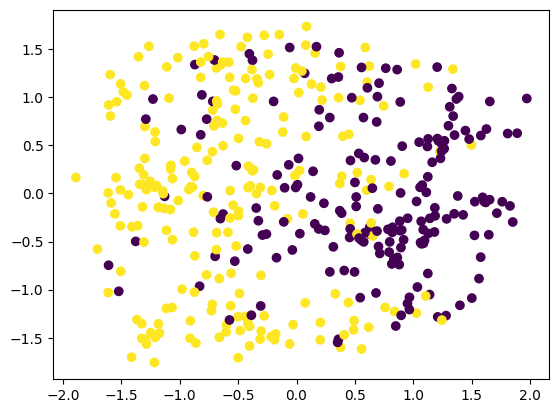

有標準化


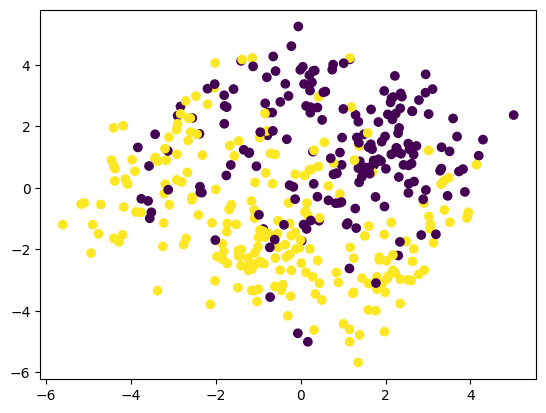

In [ ]:
print('PCA6：查看資料的分布圖表顯示')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
print('沒有標準化')
plt.scatter(x_pca1[:,0],x_pca1[:,1],c=y)
plt.show()
print('有標準化')
plt.scatter(x_pca2[:,0],x_pca2[:,1],c=y)
plt.show()

PCA7：想要顯示資料的方向性
沒有標準化，所以呼叫pca1物件


計算這兩個主成分的直線範圍
請找出資料之間的最大標準差
繪製主成分直線


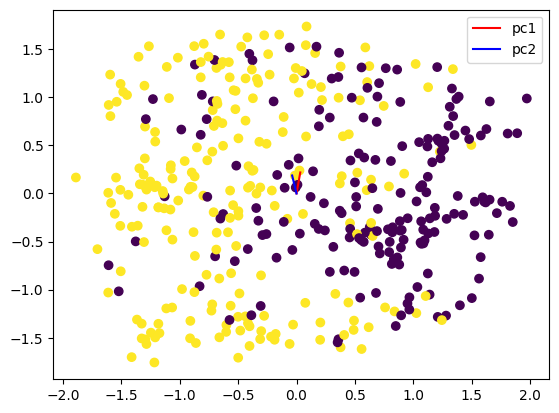

In [ ]:
print('PCA7：想要顯示資料的方向性')
print('沒有標準化，所以呼叫pca1物件')
import numpy as np
pca1_vector=pca1.components_[0]#第一主成分
pca2_vector=pca1.components_[1]#第二主成分
print('計算這兩個主成分的直線範圍')
print('請找出資料之間的最大標準差')
scale=np.max(np.std(x_pca1,axis=0))
origin=[0,0]
pca1_line=pca1_vector*scale
pca2_line=pca2_vector*scale
print('繪製主成分直線')
plt.scatter(x_pca1[:,0],x_pca1[:,1],c=y)
plt.plot([origin[0],pca1_line[0]],[origin[1],pca1_line[1]],color='red',label='pc1')
plt.plot([origin[0],pca2_line[0]],[origin[1],pca2_line[1]],color='blue',label='pc2')
plt.legend()
plt.show()

PCA7：想要顯示資料的方向性
有標準化，所以呼叫pca2物件


計算這兩個主成分的直線範圍
繪製主成分直線


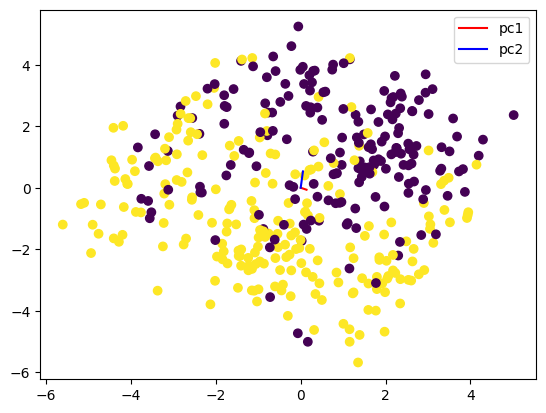

In [ ]:
print('PCA7：想要顯示資料的方向性')
print('有標準化，所以呼叫pca2物件')
pca1_vector=pca2.components_[0]#第一主成分
pca2_vector=pca2.components_[1]#第二主成分
print('計算這兩個主成分的直線範圍')
scale=np.max(np.std(x_pca2,axis=0))
origin=[0,0]
pca1_line=pca1_vector*scale
pca2_line=pca2_vector*scale
print('繪製主成分直線')
plt.scatter(x_pca2[:,0],x_pca2[:,1],c=y)
plt.plot([origin[0],pca1_line[0]],[origin[1],pca1_line[1]],color='red',label='pc1')
plt.plot([origin[0],pca2_line[0]],[origin[1],pca2_line[1]],color='blue',label='pc2')
plt.legend()
plt.show()

In [ ]:
print('PCA8：以沒有標準化的資料進行訓練')
#1、X與y資料準備
#2、資料切割，以PCA降維後的資料進行訓練
x_train,x_test,y_train,y_test=train_test_split(x_pca1,y,test_size=0.3)
#3、產生模型物件
model1=KNeighborsClassifier(n_neighbors=10)
#4、模型物件進行訓練
model1.fit(x_train,y_train)
#5、儲存訓練後的模型
joblib.dump(model1,'model1.pkl')
#6、載入儲存後的模型檔案
model1=joblib.load('model1.pkl')
#7、模型物件進行預估
y_predict1=model1.predict(x_test) #測試
y_predict2=model1.predict(x_train) #訓練
#8、模型進行評估
print('訓練的準確率:\n',accuracy_score(y_train,y_predict2))
print('測試的準確率:\n',accuracy_score(y_test,y_predict1))
print('測試的分類報告:\n',classification_report(y_test,y_predict1))
print('測試的混淆矩陣:\n',confusion_matrix(y_test,y_predict1))

PCA8：以沒有標準化的資料進行訓練
訓練的準確率:
 0.8076923076923077
測試的準確率:
 0.7967479674796748
測試的分類報告:
               precision    recall  f1-score   support

           1       0.69      0.83      0.75        46
           2       0.88      0.78      0.83        77

    accuracy                           0.80       123
   macro avg       0.79      0.80      0.79       123
weighted avg       0.81      0.80      0.80       123

測試的混淆矩陣:
 [[38  8]
 [17 60]]


In [ ]:
print('PCA8：以有標準化的資料進行訓練')
#1、X與y資料準備
#2、資料切割，以PCA降維後的資料進行訓練
x_train,x_test,y_train,y_test=train_test_split(x_pca2,y,test_size=0.3)
#3、產生模型物件
model1=KNeighborsClassifier(n_neighbors=10)
#4、模型物件進行訓練
model1.fit(x_train,y_train)
#5、儲存訓練後的模型
joblib.dump(model1,'model1.pkl')
#6、載入儲存後的模型檔案
model1=joblib.load('model1.pkl')
#7、模型物件進行預估
y_predict1=model1.predict(x_test) #測試
y_predict2=model1.predict(x_train) #訓練
#8、模型進行評估
print('訓練的準確率:\n',accuracy_score(y_train,y_predict2))
print('測試的準確率:\n',accuracy_score(y_test,y_predict1))
print('測試的分類報告:\n',classification_report(y_test,y_predict1))
print('測試的混淆矩陣:\n',confusion_matrix(y_test,y_predict1))

PCA8：以有標準化的資料進行訓練
訓練的準確率:
 0.7972027972027972
測試的準確率:
 0.8130081300813008
測試的分類報告:
               precision    recall  f1-score   support

           1       0.77      0.79      0.78        52
           2       0.84      0.83      0.84        71

    accuracy                           0.81       123
   macro avg       0.81      0.81      0.81       123
weighted avg       0.81      0.81      0.81       123

測試的混淆矩陣:
 [[41 11]
 [12 59]]


In [ ]:
print('Kernel PCA1:資料的準備')
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
x=kk3.iloc[:,:-1]
y=kk3.iloc[:,-1]
print(y.isna().sum())
print('Kernel PCA2:進行標準化動作')
x2=StandardScaler().fit_transform(x)
print('Kernel PCA3:產生KernelPCA物件，設定2個欄位，可嘗試線性與RBF平面')
kpca_linear=KernelPCA(n_components=2,kernel='linear')#產生物件，後續將針對線性的x進行處理
kpca_rbf=KernelPCA(n_components=2,kernel='rbf',gamma=0.3)#產生物件，後續將針對平面的x進行處理
print('Kernel PCA4:針對沒有標準化與有標準化的x進行pca的訓練與轉換')
x_kpca_linear=kpca_linear.fit_transform(x)
x_kpca_rbf=kpca_rbf.fit_transform(x2)
print('Kernel CA5:查看資料的損失比例:非線性所以沒有損失比例')
#print('沒有標準化')
#print(pca1.explained_variance_ratio_)
#print('有標準化')
#print(pca2.explained_variance_ratio_)


Kernel PCA1:資料的準備
0
Kernel PCA2:進行標準化動作
Kernel PCA3:產生KernelPCA物件，設定2個欄位，可嘗試線性與RBF平面
Kernel PCA4:針對沒有標準化與有標準化的x進行pca的訓練與轉換
Kernel CA5:查看資料的損失比例:非線性所以沒有損失比例


Kernel PCA6：查看資料的分布圖表顯示
線性


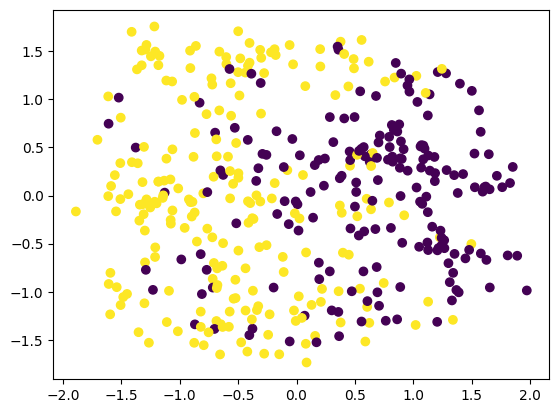

平面


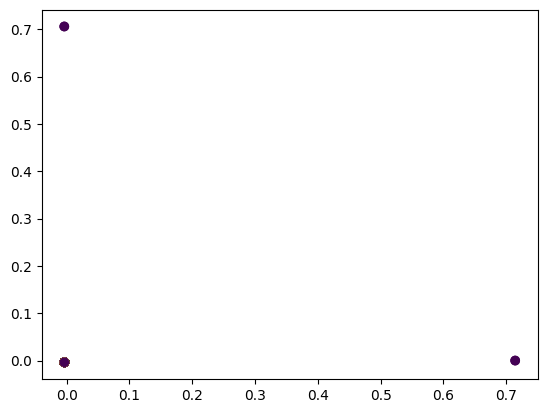

In [ ]:
print('Kernel PCA6：查看資料的分布圖表顯示')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
print('線性')
plt.scatter(x_kpca_linear[:,0],x_kpca_linear[:,1],c=y)
plt.show()
print('平面')
plt.scatter(x_kpca_rbf[:,0],x_kpca_rbf[:,1],c=y)
plt.show()

In [ ]:
print('PCA8：以kpca的線性的資料進行訓練')
#1、X與y資料準備
#2、資料切割，以PCA降維後的資料進行訓練
x_train,x_test,y_train,y_test=train_test_split(x_kpca_linear,y,test_size=0.3)
#3、產生模型物件
model1=KNeighborsClassifier(n_neighbors=10)
#4、模型物件進行訓練
model1.fit(x_train,y_train)
#5、儲存訓練後的模型
joblib.dump(model1,'model1.pkl')
#6、載入儲存後的模型檔案
model1=joblib.load('model1.pkl')
#7、模型物件進行預估
y_predict1=model1.predict(x_test) #測試
y_predict2=model1.predict(x_train) #訓練
#8、模型進行評估
print('訓練的準確率:\n',accuracy_score(y_train,y_predict2))
print('測試的準確率:\n',accuracy_score(y_test,y_predict1))
print('測試的分類報告:\n',classification_report(y_test,y_predict1))
print('測試的混淆矩陣:\n',confusion_matrix(y_test,y_predict1))

PCA8：以kpca的線性的資料進行訓練
訓練的準確率:
 0.8496503496503497
測試的準確率:
 0.7479674796747967
測試的分類報告:
               precision    recall  f1-score   support

           1       0.74      0.73      0.74        59
           2       0.75      0.77      0.76        64

    accuracy                           0.75       123
   macro avg       0.75      0.75      0.75       123
weighted avg       0.75      0.75      0.75       123

測試的混淆矩陣:
 [[43 16]
 [15 49]]


In [ ]:
print('PCA8：以kpca的平面的資料進行訓練')
#1、X與y資料準備
#2、資料切割，以PCA降維後的資料進行訓練
x_train,x_test,y_train,y_test=train_test_split(x_kpca_rbf,y,test_size=0.3)
#3、產生模型物件
model1=KNeighborsClassifier(n_neighbors=10)
#4、模型物件進行訓練
model1.fit(x_train,y_train)
#5、儲存訓練後的模型
joblib.dump(model1,'model1.pkl')
#6、載入儲存後的模型檔案
model1=joblib.load('model1.pkl')
#7、模型物件進行預估
y_predict1=model1.predict(x_test) #測試
y_predict2=model1.predict(x_train) #訓練
#8、模型進行評估
print('訓練的準確率:\n',accuracy_score(y_train,y_predict2))
print('測試的準確率:\n',accuracy_score(y_test,y_predict1))
print('測試的分類報告:\n',classification_report(y_test,y_predict1))
print('測試的混淆矩陣:\n',confusion_matrix(y_test,y_predict1))

PCA8：以kpca的平面的資料進行訓練
訓練的準確率:
 0.6748251748251748
測試的準確率:
 0.5609756097560976
測試的分類報告:
               precision    recall  f1-score   support

           1       0.48      0.65      0.55        51
           2       0.67      0.50      0.57        72

    accuracy                           0.56       123
   macro avg       0.57      0.57      0.56       123
weighted avg       0.59      0.56      0.56       123

測試的混淆矩陣:
 [[33 18]
 [36 36]]
